# Proyecto: Análisis de mercado inmobiliario. Segunda aproximación


Vamos a tener una segunda aproximación frente al dataset dado para evaluar los mejores modelos para determinar el precio por las características de la propiedad.

**CARGA DEL DATASET**

In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

Hacemos un link de la carpeta con el google drive para traer el archivo

**IMPORTACIÓN DE LIBRERÍAS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Importamos las librerías que vamos a usar para el proyecto.

**CARGA DEL DATASET**

In [3]:
'''
prop = pd.read_csv('drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv')

p = pd.DataFrame(prop)
print("Filas:", p.shape[0], " Columnas: ", p.shape[1], "\n")
print("\x1b[1;30m" + "Primeras cinco instancias: " + "\033[", "\n")
p.head()
'''

'\nprop = pd.read_csv(\'drive/MyDrive/DS_Proyecto_01_Datos_Properati.csv\')\n\np = pd.DataFrame(prop)\nprint("Filas:", p.shape[0], " Columnas: ", p.shape[1], "\n")\nprint("\x1b" + "Primeras cinco instancias: " + "\x1b[", "\n")\np.head()\n'

In [4]:
prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

p = pd.DataFrame(prop)
print("Filas:", p.shape[0], " Columnas: ", p.shape[1], "\n")
print("\x1b[1;30m" + "Primeras cinco instancias: " + "\033[", "\n")
p.head()

Filas: 146660  Columnas:  19 

Primeras cinco instancias: [ 



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Importamos el dataset y visualizamos la cantidad de filas y columnas y también la estructura de la tabla.

**FILTRADO DE DATASET**

In [5]:
p2 = p[(p.l2 == "Capital Federal") & ((p.property_type == "Departamento") | (p.property_type == "Casa") | (p.property_type == "PH"))]

print("Filas: ", p2.shape[0], "Columnas: ", p2.shape[1])

Filas:  91485 Columnas:  19


Filtramos el dataset de acuerdo con las mismas instrucciones del dataset 1 para realizar los modelos sobre la misma base: 
Casas, departamentos y PHs en venta en la Capital Federal. 

In [6]:
p3 = p2.drop(["start_date", "end_date", "created_on", "l1", "l2", "currency", "operation_type"], axis=1)
print(p3.shape)

(91485, 12)


Eliminamos las columnas que no nos interesan o por tener datos irrelevantes para nuestra actual investigación o por tener datos únicos de acuerdo a lo visto en el proyecto 1.

In [7]:
p4i = p3[p3.title.str.contains('Alq', case = False) == False]
p4= p4i.reset_index(drop=True)
print(p4.shape)
p4

(91297, 12)


,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,-34.605880,-58.384949,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,-34.624056,-58.412110,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,-34.593569,-58.427474,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,-34.581294,-58.436754,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
4,-34.593779,-58.441239,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH
...,...,...,...,...,...,...,...,...,...,...,...,...
91292,-34.585355,-58.427194,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH
91293,-34.585355,-58.427194,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH
91294,-34.584134,-58.436389,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH
91295,-34.583995,-58.417645,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento


Filtramos por las propiedades cuyas descripciones incluyen alquiler en el título por lo visto en el proyecto1.

In [8]:
p5 = p4[p4.duplicated()]
print(p5.shape, "\n")
print('\x1b[1;30m', 'Cantidad de porcentaje de duplicados: ', '\033[', round(p5.shape[0]*100/p4.shape[0],2), "%", "\n")
p5

(24815, 12) 

 Cantidad de porcentaje de duplicados:  [ 27.18 % 



,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
6,-34.600988,-58.433061,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH
8,-34.639598,-58.419612,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
30,-34.597613,-58.416688,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
33,-34.597613,-58.416688,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
35,-34.597613,-58.416688,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento
...,...,...,...,...,...,...,...,...,...,...,...,...
91288,NaN,NaN,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH de diseño - 5 ambientes con Terraza sobre ...,PH de diseño de 2 dormitorios con escritorio a...,PH
91289,-34.582439,-58.432875,Palermo,4.0,3.0,2.0,103.0,98.0,660000.0,Venta Torre Mirabilia - 4 ambientes c/coch - P...,Espectacular 4 ambientes en emblemáticas torre...,Departamento
91290,-34.581699,-58.433547,Palermo,4.0,2.0,3.0,159.0,98.0,539000.0,Cabrera 5800 esq. Carranza - Divino Departamen...,Espectacular departamento en el corazón de Pal...,Departamento
91291,-34.581308,-58.431236,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Torre Mirabilia - 4 amb - Piso Alto 106m2,Living comedor con acceso a Balcón aterrazadoM...,Departamento


Visualizamos la cantidad de duplicados de nuestro Dataset. Vemos que el porcentaje según las columnas que tenemos es mucho, un 27% de nuestro dataset. Igual, al ser datos repetidos los tenemos que eliminar para evitar un modelo errado. Las fechas no las tomamos porque pueden haber entradas iguales en días diferentes.

In [9]:
p6 = p4.drop_duplicates(keep = 'first')
p6.shape

(66482, 12)

Hacemos un drop de los duplicados y nos quedamos con el dataset restante que es un 27% menor que el primero.

In [10]:
p7 = p6[(p4.rooms < p4.bedrooms)]
p7.shape

<ipython-input-10-1e419067c68b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p7 = p6[(p4.rooms < p4.bedrooms)]


(60, 12)

Estudiamos la cantidad de propiedades en las cuales se registró menor cantidad de ambientes que de cuartos según lo visto en el Proyeto1.

In [11]:
p8 = p6.copy()
p8.loc[p8.bedrooms > p8.rooms, "bedrooms"] = p8.loc[p8.bedrooms > p8.rooms, "rooms"]

En las propiedades cuyos cuartos superan a los amientes los reemplazamos por los ambientes. 

In [12]:
p9 = p8[(p8.surface_total < p8.surface_covered)]
p9.shape

(750, 12)

Observamos la cantidad de datos cuya superficie total es menor a la cubierta.

In [13]:
p10 = p8.copy()
p10.loc[p10.surface_covered > p10.surface_total, "surface_covered"] = p10.loc[p10.surface_total > p10.surface_covered, "surface_total"]

En las propiedades cuya superfice cubierta es superior a la total la reemplazamos por la superficie total para que sean iguales.

**TRATAMIENTO DE OUTLIERS**

In [14]:
p12 = p10.copy()
p12.describe().round(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,63280.00,63266.00,66482.00,66482.00,64432.00,58034.00,57013.00,66482.00
mean,-34.60,-58.44,2.93,1.93,1.56,120.64,96.52,255823.80
std,0.03,0.04,1.35,1.08,0.87,1168.48,918.05,318517.89
min,-34.70,-58.53,1.00,0.00,1.00,10.00,1.00,6000.00
25%,-34.62,-58.47,2.00,1.00,1.00,49.00,44.00,119900.00
50%,-34.60,-58.44,3.00,2.00,1.00,70.00,62.00,170000.00
75%,-34.58,-58.41,4.00,3.00,2.00,114.00,96.00,279000.00
max,-34.54,-58.35,26.00,15.00,14.00,126062.00,126062.00,32434232.00


Observaciones: En esta tabla vemos como los máximos de todas las columnas son muy altos comparados a su promedio. También vemos como la dispersión de surface_total, surface_covered, price es muy grande. Resutan dudosos los valores mínimos de 1 de surface_covered y 10 de surface_total así como también el 0 de bedrooms, sería bueno investigar como está compuesta esta instancia.

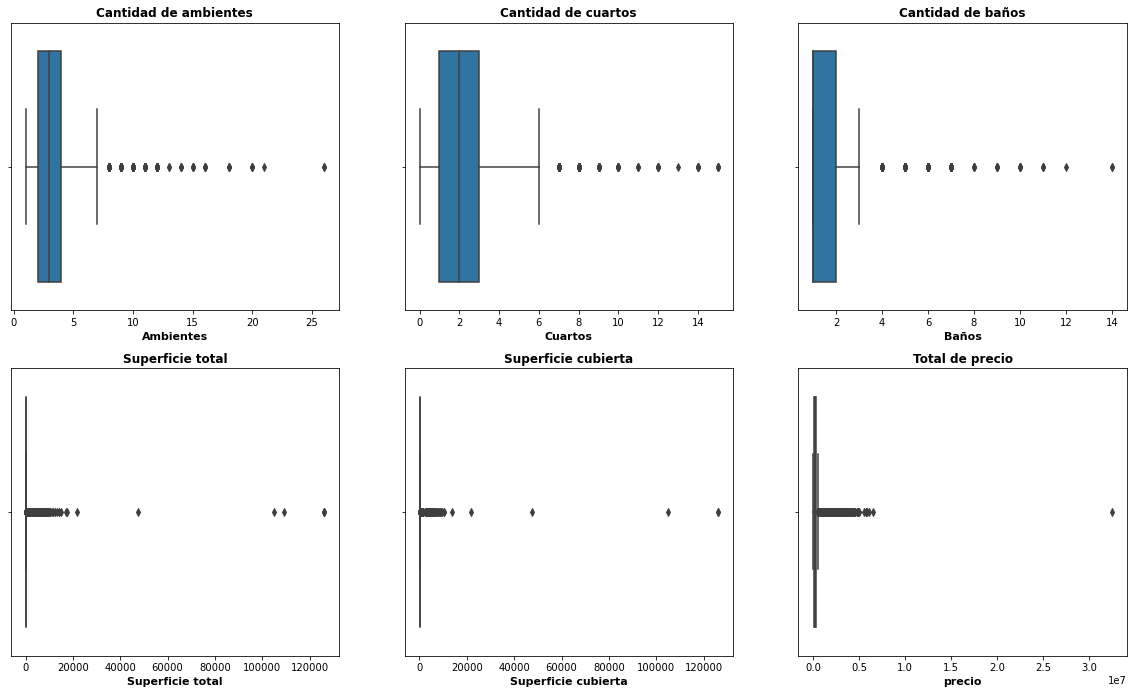

In [15]:
def boxplots (v):
    plt.figure(figsize=(20,18))


    plt.subplot(3, 3, 1)
    plt.title("Cantidad de ambientes", fontsize = 12, fontweight="bold")
    sns.boxplot(data = v, x = "rooms")
    plt.xticks(fontsize = 10)
    plt.xlabel("Ambientes", fontsize = 11, fontweight="bold")
    
    plt.subplot(3, 3, 2)
    plt.title("Cantidad de cuartos", fontsize = 12, fontweight="bold")
    sns.boxplot(data = v, x = "bedrooms")
    plt.xticks(fontsize = 10)
    plt.xlabel("Cuartos", fontsize = 11, fontweight="bold")

    plt.subplot(3, 3, 3)
    plt.title("Cantidad de baños", fontsize = 12, fontweight="bold")
    sns.boxplot(data = v, x = "bathrooms")
    plt.xticks(fontsize = 10)
    plt.xlabel("Baños", fontsize = 11, fontweight="bold")

    plt.subplot(3, 3, 4)
    plt.title("Superficie total", fontsize = 12, fontweight="bold")
    sns.boxplot(data = v, x = "surface_total")
    plt.xticks(fontsize = 10)
    plt.xlabel("Superficie total", fontsize = 11, fontweight="bold")

    plt.subplot(3, 3, 5)
    plt.title("Superficie cubierta", fontsize = 12, fontweight="bold")
    sns.boxplot(data = v, x = "surface_covered")
    plt.xticks(fontsize = 10)
    plt.xlabel("Superficie cubierta", fontsize = 11, fontweight="bold")

    plt.subplot(3, 3, 6)
    plt.title("Total de precio", fontsize = 12, fontweight="bold")
    sns.boxplot(data = v, x = "price")
    plt.xticks(fontsize = 10)
    plt.xlabel("precio", fontsize = 11, fontweight="bold")

boxplots (p12)

Hacemos boxplots para observar la distribución de los datos y observamos lo mismo que la tabla anterior. 1- Todas las columnas tienen máximos muy altos con respecto al promedio. 2- Las columnas de Superficie total, superfice cubierta y precio tienen una dispersión muy alta.

In [16]:
def outliers (v):
  q25 = v.quantile(0.25)
  q75 = v.quantile(0.75)
  iqr = q75 - q25
  mascara_outliers = np.logical_or(v < q25 - iqr * 1.5, v > q75 + iqr * 1.5)
  print(q25,q75,iqr)
  print(mascara_outliers.sum())
  return (mascara_outliers)

a = 0  
print('\x1b[1;30m', 'Rooms', '\033[')
m1 = outliers(p12.rooms)
p13 = p12[~m1]
print(p13.shape)
a = m1.sum()

 Rooms [
2.0 4.0 2.0
446
(66036, 12)


Para la eliminación de outiers vamos a realizar una función. El método elegido es el de rango intercuartílico. El output impreso va a ser el q25, el q75 y el iqr que es la diferencia entre los dos. También vamos a visualizar los datos que salen del rango q25 - iqr*1.5 y q75 + iqr*1.5, que van a ser nuestros outliers. Finalmente visualizamos los eliminados categoría, los cuales vamos a ir sumando en la variable a. 

In [17]:
print('\x1b[1;30m', 'Bedrooms', '\033[')
m2 = outliers(p13.bedrooms)
p14 = p13[~m2]
print(p14.shape)
a += m2.sum()

 Bedrooms [
1.0 3.0 2.0
14
(66022, 12)


In [18]:
print('\x1b[1;30m', 'Bathrooms', '\033[')
m3 = outliers(p14.bathrooms)
p15 = p14[~m3]
print(p15.shape)
a += m3.sum()

 Bathrooms [
1.0 2.0 1.0
2210
(63812, 12)


In [19]:
print('\x1b[1;30m', 'Surface_total', '\033[')
m4 = outliers(p15.surface_total)
p16 = p15[~m4]
print(p16.shape)
a += m4.sum()

 Surface_total [
48.0 105.5 57.5
3896
(59916, 12)


In [20]:
print('\x1b[1;30m', 'Surface_covered', '\033[')
m5 = outliers(p16.surface_covered)
p17 = p16[~m5]
print(p17.shape)
a += m5.sum()

 Surface_covered [
42.0 81.0 39.0
2132
(57784, 12)


In [21]:
print('\x1b[1;30m', 'price', '\033[')
m6 = outliers(p17.price)
p19 = p17[~m6]
print(p19.shape)
a += m6.sum()

 price [
114000.0 230000.0 116000.0
2881
(54903, 12)


In [22]:
print('Total de outliers quitados del dataset =', a)
print('Porcentaje de outliers quitados del dataset = ', (a*100/p12.shape[0]).round(2), '%')

Total de outliers quitados del dataset = 11579
Porcentaje de outliers quitados del dataset =  17.42 %


Visualizamos la cantidad total de datos eliminados y el porcentaje que representa de nuestro dataset original. Por lo que visualizamos es una cantidad sumamente grande por lo que teníamos muchos outliers.

In [23]:
p19.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,52685.000000,52673.000000,54903.000000,54903.000000,53042.000000,47230.000000,46376.000000,54903.000000
mean,-34.600543,-58.440825,2.580934,1.660164,1.305324,68.733580,59.962524,170351.464292
std,0.025875,0.038132,1.006700,0.846636,0.533423,31.066731,24.363581,78991.087366
min,-34.696419,-58.530467,1.000000,0.000000,1.000000,10.000000,1.000000,7500.000000
25%,-34.618688,-58.468208,2.000000,1.000000,1.000000,45.000000,41.000000,110000.000000
50%,-34.601345,-58.439912,3.000000,2.000000,1.000000,61.000000,55.000000,150000.000000
75%,-34.582611,-58.411110,3.000000,2.000000,2.000000,85.000000,74.000000,219000.000000
max,-34.535909,-58.353930,7.000000,6.000000,3.000000,191.000000,139.000000,404000.000000


Visualizamos como los máximos bajaron mucho, a la vez el desvío stadard se acomodó mucho mejor.

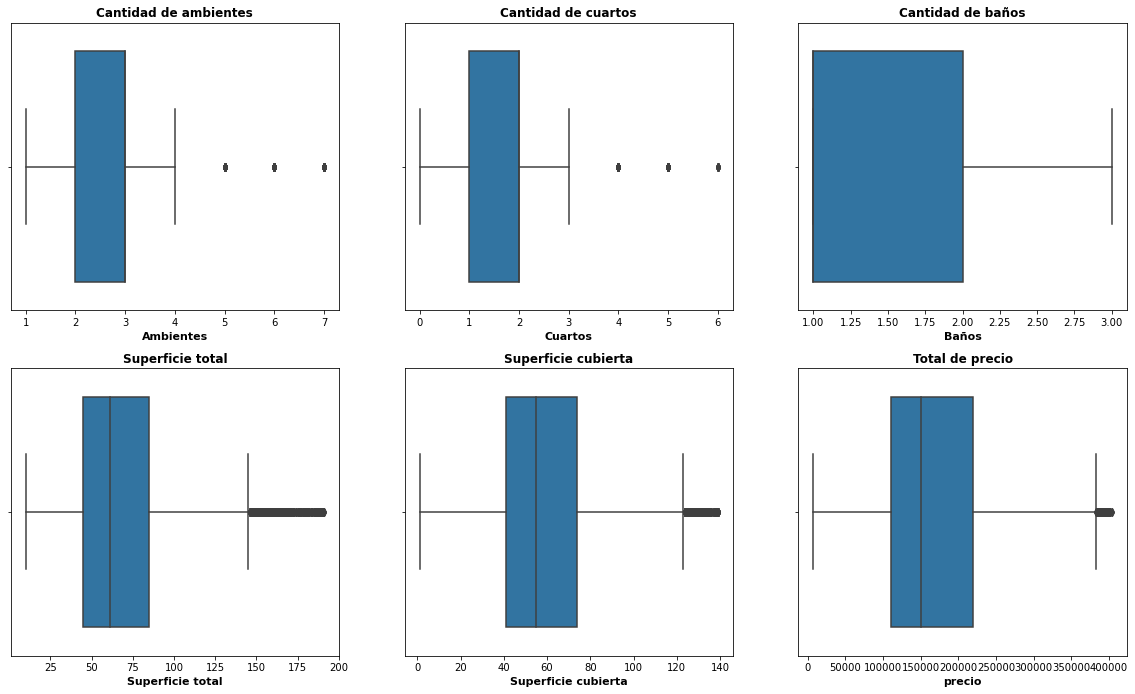

In [24]:
boxplots(p19)

Vemos como mejoró mucho nuestra visualización de datos

**TRATAMINETO DE VALORES FALTANTES**

In [25]:
print("\x1b[1;30m" + "Cantidad de datos faltantes por columnas:" + "\033[")
p19.isnull().sum()

Cantidad de datos faltantes por columnas:[


lat                2218
lon                2230
l3                    0
rooms                 0
bedrooms              0
bathrooms          1861
surface_total      7673
surface_covered    8527
price                 0
title                 0
description           0
property_type         0
dtype: int64

Visualizamos la cantidad de valores faltantes por columnas

In [26]:
print("\x1b[1;30m" + "Tabla de nulls por latitud: " + "\033[", "\n")
p19nulllat = p19.lat.isnull().groupby([p8.l3]).sum().astype(int).reset_index(name='null')
print(p19nulllat,  "\n")

Tabla de nulls por latitud: [ 

                      l3  null
0                 Abasto     4
1              Agronomía     1
2                Almagro   113
3              Balvanera    63
4               Barracas     4
5           Barrio Norte   209
6               Belgrano   293
7                   Boca     1
8                  Boedo    11
9              Caballito   164
10             Catalinas     0
11  Centro / Microcentro    23
12             Chacarita    10
13               Coghlan     3
14            Colegiales     4
15              Congreso    26
16          Constitución     4
17                Flores   130
18              Floresta    10
19           Las Cañitas    24
20               Liniers    13
21             Mataderos     8
22             Monserrat    11
23          Monte Castro     3
24                 Nuñez    38
25                  Once     7
26               Palermo   481
27     Parque Avellaneda     1
28     Parque Centenario     7
29      Parque Chacabuco     5
30    

Empezamos por el tratamiento de valores faltantes de latitud. Observamos varios valores faltantes por barrios, siendo Palermo el barrio más con mayor cantidad de valores faltantes.

In [27]:
print ("\x1b[1;30m" + "Tabla de latitud, agrupados por barrio y promedio: " + "\033[", "\n")
p19lat_mean = p19.groupby(p10['l3']).lat.apply(lambda x: x.mean()).reset_index().rename(columns={0 :'l3', 1 : 'mean'})
p19lat_mean.columns = ['_'.join(col) for col in p19lat_mean .columns.values]
p19lat_mean.columns = p19lat_mean .columns.str.replace('l_3', 'l3')
p19lat_mean.columns =p19lat_mean .columns.str.replace('l_a_t', 'lat_mean')
print(p19lat_mean)

Tabla de latitud, agrupados por barrio y promedio: [ 

                      l3   lat_mean
0                 Abasto -34.604796
1              Agronomía -34.593820
2                Almagro -34.606801
3              Balvanera -34.610038
4               Barracas -34.638057
5           Barrio Norte -34.593047
6               Belgrano -34.562841
7                   Boca -34.632948
8                  Boedo -34.627475
9              Caballito -34.617977
10             Catalinas -34.598396
11  Centro / Microcentro -34.603876
12             Chacarita -34.587548
13               Coghlan -34.561592
14            Colegiales -34.576367
15              Congreso -34.609287
16          Constitución -34.625338
17                Flores -34.628543
18              Floresta -34.631288
19           Las Cañitas -34.569862
20               Liniers -34.644081
21             Mataderos -34.654136
22             Monserrat -34.614461
23          Monte Castro -34.620383
24                 Nuñez -34.548215
25      

Vamos a hacer una imputación de valores faltantes de latitud de acuerdo a los promedios por barrio, ya que los barrios están localizados entre latitudes.

In [28]:
result = pd.DataFrame({});
separado = {}
separado2 = {}
separado3 = {}
mascara2 = {}
zeros = {}
rep = {}
a = 0

for i in range(p19nulllat.shape[0]):
  a += 1
  barrio = p19nulllat.l3[i]
  mascara3 = p19[p19.l3 == barrio]
  zeros[a] = np.zeros(p19nulllat.null[i])
  mascara2 = p19lat_mean[p19lat_mean.l3 == barrio]
  separado2[a] = mascara2.lat_mean 
  rep[a] = np.where(zeros[a] == 0, separado2[a], zeros[a])
  separado3[a] = mascara3

for i in separado3:
  arr = rep[i]
  m = separado3[i].lat.isna()
  separado3[i].loc[m, 'lat'] = arr
  frames = [result, separado3[i]]
  result = pd.concat(frames)


print(result.isnull().sum())
print(result.shape)

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


lat                   0
lon                2230
l3                    0
rooms                 0
bedrooms              0
bathrooms          1861
surface_total      7673
surface_covered    8527
price                 0
title                 0
description           0
property_type         0
dtype: int64
(54903, 12)


Reemplazamos los nulos de latitud por el promedio por cada barrio y luego visualizamos que ya no quedan datos nulos en latitud.

In [29]:
print("\x1b[1;30m" + "Tabla de nulls por longitud: " + "\033[", "\n")
nulllon = result.lon.isnull().groupby([result.l3]).sum().astype(int).reset_index(name='null')
print(nulllon,  "\n")

Tabla de nulls por longitud: [ 

                      l3  null
0                 Abasto     4
1              Agronomía     1
2                Almagro   113
3              Balvanera    63
4               Barracas     4
5           Barrio Norte   209
6               Belgrano   294
7                   Boca     1
8                  Boedo    11
9              Caballito   164
10             Catalinas     0
11  Centro / Microcentro    23
12             Chacarita    10
13               Coghlan     3
14            Colegiales     4
15              Congreso    26
16          Constitución     4
17                Flores   130
18              Floresta    10
19           Las Cañitas    24
20               Liniers    16
21             Mataderos    11
22             Monserrat    11
23          Monte Castro     3
24                 Nuñez    38
25                  Once     7
26               Palermo   483
27     Parque Avellaneda     1
28     Parque Centenario     7
29      Parque Chacabuco     5
30   

Realizamos lo mismo que realizamos con la latitud pero para la longitud.

In [30]:
print ("\x1b[1;30m" + "Tabla de nulls por longitud, agrupados por barrio y promedio: " + "\033[", "\n")
lon_mean = result.groupby(result['l3']).lon.apply(lambda x: x.mean()).reset_index().rename(columns={0 :'l3', 1 : 'mean'})
lon_mean.columns = ['_'.join(col) for col in lon_mean .columns.values]
lon_mean.columns = lon_mean.columns.str.replace('l_3', 'l3')
lon_mean.columns =lon_mean .columns.str.replace('l_o_n', 'lon_mean')
print(lon_mean)

Tabla de nulls por longitud, agrupados por barrio y promedio: [ 

                      l3   lon_mean
0                 Abasto -58.413487
1              Agronomía -58.490422
2                Almagro -58.421586
3              Balvanera -58.402838
4               Barracas -58.375083
5           Barrio Norte -58.402499
6               Belgrano -58.454850
7                   Boca -58.363249
8                  Boedo -58.418070
9              Caballito -58.442413
10             Catalinas -58.371699
11  Centro / Microcentro -58.380916
12             Chacarita -58.450227
13               Coghlan -58.474505
14            Colegiales -58.450862
15              Congreso -58.394458
16          Constitución -58.385282
17                Flores -58.463369
18              Floresta -58.483719
19           Las Cañitas -58.433557
20               Liniers -58.518481
21             Mataderos -58.502738
22             Monserrat -58.383935
23          Monte Castro -58.504378
24                 Nuñez -58.4649

Realizamos lo mismo del promedio para la longitud ya que los barrios están circunscriptos también en una cierta longitud.

In [31]:
result2 = pd.DataFrame({});
separado = {}
separado2 = {}
separado3 = {}
mascara2 = {}
zeros = {}
rep = {}
a = 0

for i in range(nulllon.shape[0]):
  a += 1
  barrio = nulllon.l3[i]
  mascara3 = result[result.l3 == barrio]
  zeros[a] = np.zeros(nulllon.null[i])
  mascara2 = lon_mean[lon_mean.l3 == barrio]
  separado2[a] = mascara2.lon_mean 
  rep[a] = np.where(zeros[a] == 0, separado2[a], zeros[a])
  separado3[a] = mascara3

for i in separado3:
  arr = rep[i]
  m = separado3[i].lon.isna()
  separado3[i].loc[m, 'lon'] = arr
  frames = [result2, separado3[i]]
  result2 = pd.concat(frames)

print(result2.isnull().sum())
print(result2.shape)

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


lat                   0
lon                   0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1861
surface_total      7673
surface_covered    8527
price                 0
title                 0
description           0
property_type         0
dtype: int64
(54903, 12)


Hacemos lo mismo que con la latitud, reemplazando los nulos por el promedio por barrio y observamos que ya no quedan datos faltantes en latitud y longitud.

Text(0, 0.5, 'Latitud')

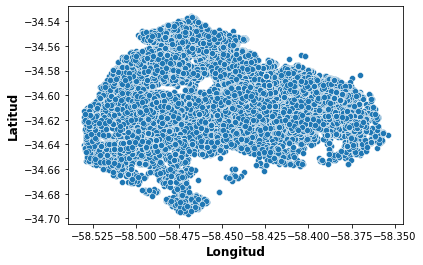

In [32]:
sns.scatterplot(x="lon", y="lat", data=result2)
plt.xlabel("Longitud", fontweight = "black", fontsize = 12)
plt.ylabel("Latitud", fontweight = "black", fontsize = 12)

Vemos que quedaron bien implementados los promedios por barrios de latitud y longitud, ya que aparecen en el mapa de Capital Federal.

In [33]:
print("\x1b[1;30m" + "Tabla de nulls de baños por ambientes y tipo de propiedad: " + "\033[", "\n")
nulllbath = result2.bathrooms.isnull().groupby([result2.rooms, result2.property_type]).sum().astype(int).reset_index(name='null')
print(nulllbath,  "\n")

Tabla de nulls de baños por ambientes y tipo de propiedad: [ 

    rooms property_type  null
0     1.0          Casa     1
1     1.0  Departamento   487
2     1.0            PH     1
3     2.0          Casa     5
4     2.0  Departamento   569
5     2.0            PH    10
6     3.0          Casa    17
7     3.0  Departamento   505
8     3.0            PH    29
9     4.0          Casa    29
10    4.0  Departamento   133
11    4.0            PH    19
12    5.0          Casa    13
13    5.0  Departamento    32
14    5.0            PH     4
15    6.0          Casa     1
16    6.0  Departamento     0
17    6.0            PH     2
18    7.0          Casa     2
19    7.0  Departamento     1
20    7.0            PH     1 



Vemos la cantidad de nulos de baños por ambientes y tipos de propiedad. Optamos por esta estrategia por saber la relación de baños con ambientes y tipos de propiedad del proyecto1.

In [34]:
col2= result2.rooms
col3 = result2.property_type

print ("\x1b[1;30m" + "Tabla de moda de bathrooms por tipo de propiedad y cantidad de ambientes" + "\033[", "\n")
bathroomsmode = result2.groupby([col2, col3]).bathrooms.apply(lambda x: x.mode()).reset_index().rename(columns={0 :'bathrooms', 1 : 'property_type', 2 : 'mode'})
bathroomsmode.columns = ['_'.join(col) for col in bathroomsmode.columns.values]
bathroomsmode.columns = bathroomsmode.columns.str.replace('r_o_o_m_s','rooms')
bathroomsmode.columns = bathroomsmode.columns.str.replace('p_r_o_p_e_r_t_y___t_y_p_e','property_type')
bathroomsmode.columns = bathroomsmode.columns.str.replace('b_a_t_h_rooms','bathrooms_mode')
bathroomsmode1 = bathroomsmode.drop(columns= 'l_e_v_e_l___2')
print(bathroomsmode1)

Tabla de moda de bathrooms por tipo de propiedad y cantidad de ambientes[ 

    rooms property_type  bathrooms_mode
0     1.0          Casa             1.0
1     1.0  Departamento             1.0
2     1.0            PH             1.0
3     2.0          Casa             1.0
4     2.0  Departamento             1.0
5     2.0            PH             1.0
6     3.0          Casa             1.0
7     3.0  Departamento             1.0
8     3.0            PH             1.0
9     4.0          Casa             2.0
10    4.0  Departamento             2.0
11    4.0            PH             1.0
12    5.0          Casa             2.0
13    5.0  Departamento             2.0
14    5.0            PH             2.0
15    6.0          Casa             2.0
16    6.0  Departamento             2.0
17    6.0            PH             2.0
18    7.0          Casa             1.0
19    7.0          Casa             3.0
20    7.0  Departamento             3.0
21    7.0            PH             2.0


Visualizamos la moda de la cantidad de baños por cantidad de ambientes y tipo de propiedad.

In [35]:
element3 = {};
result3 = pd.DataFrame({});
separado3 = {}
separado4 = {}
separado5 = {}
mascara3 =  {};
mascara4 = {}
zeros = {}
rep = {}
a = 0

data = result2
col1 = 'rooms'
col2 = 'property_type'
col3 = 'bathrooms'
nulldata = nulllbath
modadata = bathroomsmode
colmoda = 'bathrooms_mode'


for e in result2.rooms.unique():
  for i in result2.property_type.unique():
    a += 1
    mascara3 = result2[(result2.rooms == e) & (result2.property_type == i)]
    mascara4 = bathroomsmode[(bathroomsmode.rooms == e) & (bathroomsmode.property_type == i)]
    mascara5 = nulllbath[(nulllbath.rooms == e) & (nulllbath.property_type == i)]
    m5numpy = mascara5.null.to_numpy()
    zeros[a] = np.zeros(m5numpy)
    separado4[a] = mascara4.bathrooms_mode
    rep[a] = np.where(zeros[a] == 0, separado4[a], zeros[a])
    separado3[a] = mascara3

for i in separado3:
  arr = rep[i]
  m3 = separado3[i].bathrooms.isna()
  separado3[i].loc[m3, 'bathrooms'] = arr
  frames = [result3, separado3[i]]
  result3 = pd.concat(frames)

print(result3.isnull().sum())

lat                   0
lon                   0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      7673
surface_covered    8527
price                 0
title                 0
description           0
property_type         0
dtype: int64


C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Reemplazamos los nulos en baños por la moda según los ambientes y tipos de propiedad.

***ENCODING***

Antes de usar el IterativeImputer para remover nulos vamos a Encodear nuestro dataset

In [36]:
p20 = result3.copy()
p20 = p20.reset_index(drop = True)
p20

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,-34.608246,-58.444262,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento
1,-34.603890,-58.410998,Abasto,2.0,1.0,1.0,33.0,33.0,70000.0,Departamento de 2 ambientes en venta zona Abasto,En el barrio de Balvanera con muy buena ubicac...,Departamento
2,-34.599332,-58.412171,Abasto,2.0,1.0,2.0,46.0,43.0,132411.0,Emprendimiento Gallo y San Luis ::: 2 Ambiente...,Un Proyecto de Vanguardia en esquina sobre tre...,Departamento
3,-34.603823,-58.405176,Abasto,2.0,1.0,1.0,42.0,NaN,115000.0,Venta Depto 2 ambientes balcon Sum Abasto,Corredor Responsable: Luis Varela - CSI 5527 /...,Departamento
4,-34.604796,-58.413487,Abasto,2.0,1.0,1.0,62.0,40.0,124900.0,VENTA LUMINOSO 2 AMB/BALCÓN/TERRAZA PROPIA. AB...,Corredor Responsable: JOSE A. LOPEZ - CPI 1765...,Departamento
...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,Caballito,7.0,6.0,1.0,NaN,NaN,390000.0,Casa lote propio 7amb con patios Caballito Lui...,"Casa 7 AMBIENTES O MAS en Caballito, Capital F...",Casa
54899,-34.647424,-58.495261,Mataderos,7.0,4.0,2.0,117.0,NaN,290000.0,CASA LOTE PROPIO+LOCAL+DEPTO+GARGE,Corredor Responsable: Ariel Champanier - C.U.C...,Casa
54900,-34.632856,-58.488222,Velez Sarsfield,7.0,6.0,3.0,NaN,NaN,160000.0,"Casa en Venta en Floresta, Capital federal U$S...",PH 7 AMBIENTES. CONTRAFRENTE. IMPECABLE. HOY D...,Casa
54901,-34.611912,-58.475513,Villa General Mitre,7.0,0.0,3.0,NaN,NaN,350000.0,"Casa en Venta en Villa gral.mitre, capital fe...",Casa con versatilidad de destinos en buen esta...,Casa


Visualizamos nuestro dataset y reiniciamos el índice.

In [37]:
enc = OneHotEncoder()

enc.fit(p20[['property_type']])

OneHotEncoder()

Vamos a usar el OneHotEncoder para poder que los tipos de propiedad se transformen en variable numérica.

In [38]:
enc.categories_[0]

array(['Casa', 'Departamento', 'PH'], dtype=object)

Estas son las categorías que tenemos en tipo de propiedades.

In [39]:
property_transformed = enc.transform(p20[['property_type']]).toarray()
pd.DataFrame(property_transformed, columns=enc.categories_[0])

,Casa,Departamento,PH
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
54898,1.0,0.0,0.0
54899,1.0,0.0,0.0
54900,1.0,0.0,0.0
54901,1.0,0.0,0.0


Visualizamos como queda nuestro dataframe con los tipos de propiedad encodeados.

In [40]:
p21 = p20.copy()
p22 = p21.join(pd.DataFrame(property_transformed, columns=enc.categories_[0]))
p23 = p22.drop(['title', 'description', 'property_type'], axis = 1).reset_index(drop = True)
p23

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,PH
0,-34.608246,-58.444262,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,0.0,1.0,0.0
1,-34.603890,-58.410998,Abasto,2.0,1.0,1.0,33.0,33.0,70000.0,0.0,1.0,0.0
2,-34.599332,-58.412171,Abasto,2.0,1.0,2.0,46.0,43.0,132411.0,0.0,1.0,0.0
3,-34.603823,-58.405176,Abasto,2.0,1.0,1.0,42.0,NaN,115000.0,0.0,1.0,0.0
4,-34.604796,-58.413487,Abasto,2.0,1.0,1.0,62.0,40.0,124900.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,Caballito,7.0,6.0,1.0,NaN,NaN,390000.0,1.0,0.0,0.0
54899,-34.647424,-58.495261,Mataderos,7.0,4.0,2.0,117.0,NaN,290000.0,1.0,0.0,0.0
54900,-34.632856,-58.488222,Velez Sarsfield,7.0,6.0,3.0,NaN,NaN,160000.0,1.0,0.0,0.0
54901,-34.611912,-58.475513,Villa General Mitre,7.0,0.0,3.0,NaN,NaN,350000.0,1.0,0.0,0.0


Reemplazamos el campo de tipo de propiedad por los campos de tipo de propiedad encodeados. 

In [41]:
enc2 = OneHotEncoder()

enc2.fit(p23[['l3']])

OneHotEncoder()

Usamos el OneHotEncoder para los barrios.

In [42]:
enc2.categories_[0]

array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque'], dtype=object)

Visualizamos la canitdad de barrios dierentes.

In [43]:
barrio_transformed = enc2.transform(p23[['l3']]).toarray()
pd.DataFrame(barrio_transformed, columns=enc2.categories_[0])

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizamos como quedaría nuestro Dataframe de barrios.

In [44]:
p24 = p23.copy()
p25 = p24.join(pd.DataFrame(barrio_transformed, columns=enc2.categories_[0]))
p26 = p25.drop(['l3'], axis = 1)
p26

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0,75000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-34.603890,-58.410998,2.0,1.0,1.0,33.0,33.0,70000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,132411.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-34.603823,-58.405176,2.0,1.0,1.0,42.0,NaN,115000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-34.604796,-58.413487,2.0,1.0,1.0,62.0,40.0,124900.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,7.0,6.0,1.0,NaN,NaN,390000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,-34.647424,-58.495261,7.0,4.0,2.0,117.0,NaN,290000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,-34.632856,-58.488222,7.0,6.0,3.0,NaN,NaN,160000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,-34.611912,-58.475513,7.0,0.0,3.0,NaN,NaN,350000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Reemplazamos el campo l3 por los barrios encodeados.

**ESCALADO DE DATOS**

In [45]:
p27 = p26.drop(['Casa', 'Departamento', 'PH', 'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque', 'price'], axis = 1)
p27

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0
1,-34.603890,-58.410998,2.0,1.0,1.0,33.0,33.0
2,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0
3,-34.603823,-58.405176,2.0,1.0,1.0,42.0,NaN
4,-34.604796,-58.413487,2.0,1.0,1.0,62.0,40.0
...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,7.0,6.0,1.0,NaN,NaN
54899,-34.647424,-58.495261,7.0,4.0,2.0,117.0,NaN
54900,-34.632856,-58.488222,7.0,6.0,3.0,NaN,NaN
54901,-34.611912,-58.475513,7.0,0.0,3.0,NaN,NaN


Elegimos las columnas para hacer el escalado. Eliminamos todas las binariars y la del target.


In [46]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(p27)

StandardScaler()

Importamos la librería de StandardScaler y lo definimos con nuestro DataFrame.

In [47]:
scaler.fit_transform(p27)

array([[-0.30835373, -0.10524223, -0.57707271, ..., -0.56535656,
        -1.21461057, -1.18877584],
       [-0.13907422,  0.7713203 , -0.57707271, ..., -0.56535656,
        -1.15023234, -1.10668521],
       [ 0.03802288,  0.74042782, -0.57707271, ...,  1.32569811,
        -0.73177384, -0.69623209],
       ...,
       [-1.26466176, -1.26367312,  4.38969682, ...,  3.21675279,
                nan,         nan],
       [-0.45081058, -0.92877659,  4.38969682, ...,  3.21675279,
                nan,         nan],
       [-0.45081058, -0.92877659,  4.38969682, ...,  3.21675279,
                nan,         nan]])

In [48]:
p28 = pd.DataFrame(scaler.fit_transform(p27), columns = p27.columns)
p28

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-0.308354,-0.105242,-0.577073,-0.779757,-0.565357,-1.214611,-1.188776
1,-0.139074,0.771320,-0.577073,-0.779757,-0.565357,-1.150232,-1.106685
2,0.038023,0.740428,-0.577073,-0.779757,1.325698,-0.731774,-0.696232
3,-0.136482,0.924747,-0.577073,-0.779757,-0.565357,-0.860530,NaN
4,-0.174280,0.705738,-0.577073,-0.779757,-0.565357,-0.216748,-0.819368
...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,5.126022,-0.565357,NaN,NaN
54899,-1.830747,-1.449176,4.389697,2.763711,1.325698,1.553653,NaN
54900,-1.264662,-1.263673,4.389697,5.126022,3.216753,NaN,NaN
54901,-0.450811,-0.928777,4.389697,-1.960913,3.216753,NaN,NaN


Visualizamos nuestro DataFrame transformado.

In [49]:
columns = ['Casa', 'Departamento', 'PH', 'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque', 'price']

Ponemos nuestras columnas sacadas dentro de una variable.

In [50]:
p29 = p28.copy()
p29[columns] = p26[columns]
p29

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,price
0,-0.308354,-0.105242,-0.577073,-0.779757,-0.565357,-1.214611,-1.188776,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
1,-0.139074,0.771320,-0.577073,-0.779757,-0.565357,-1.150232,-1.106685,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0
2,0.038023,0.740428,-0.577073,-0.779757,1.325698,-0.731774,-0.696232,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132411.0
3,-0.136482,0.924747,-0.577073,-0.779757,-0.565357,-0.860530,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115000.0
4,-0.174280,0.705738,-0.577073,-0.779757,-0.565357,-0.216748,-0.819368,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,5.126022,-0.565357,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390000.0
54899,-1.830747,-1.449176,4.389697,2.763711,1.325698,1.553653,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290000.0
54900,-1.264662,-1.263673,4.389697,5.126022,3.216753,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000.0
54901,-0.450811,-0.928777,4.389697,-1.960913,3.216753,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350000.0


Volvemos a añadir nuestras columnas removidas.

**USO DE ITERATIVE IMPUTER PARA IMPUTACION DE VALORES FALTANTES**

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Importamos el iterative imputer.

In [52]:
impute_it = IterativeImputer()
p30 = impute_it.fit_transform(p29)
p31 = pd.DataFrame(p30, columns = p29.columns)

Usamos el Iterative Imputer en nuestro Dataset.

In [53]:
print('Datos faltantes en Superficie cubierta: ', p31['surface_covered'].isnull().sum())
print('Datos faltantes en Superficie total: ',p31['surface_total'].isnull().sum())

Datos faltantes en Superficie cubierta:  0
Datos faltantes en Superficie total:  0


Visualizamos que la cantidad de nulos restantes en superficie cubierta y total es 0.

**VISUALIZACION DEL DATASET**

In [54]:
p31

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,price
0,-0.308354,-0.105242,-0.577073,-0.779757,-0.565357,-1.214611,-1.188776,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
1,-0.139074,0.771320,-0.577073,-0.779757,-0.565357,-1.150232,-1.106685,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0
2,0.038023,0.740428,-0.577073,-0.779757,1.325698,-0.731774,-0.696232,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132411.0
3,-0.136482,0.924747,-0.577073,-0.779757,-0.565357,-0.860530,-0.790896,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115000.0
4,-0.174280,0.705738,-0.577073,-0.779757,-0.565357,-0.216748,-0.819368,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,5.126022,-0.565357,1.731320,2.747974,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390000.0
54899,-1.830747,-1.449176,4.389697,2.763711,1.325698,1.553653,2.188088,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290000.0
54900,-1.264662,-1.263673,4.389697,5.126022,3.216753,1.175662,2.158874,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000.0
54901,-0.450811,-0.928777,4.389697,-1.960913,3.216753,1.672377,1.826041,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350000.0


Observamos como queda nuestro Dataset sin datos nulos y con tratamiento de outliers.

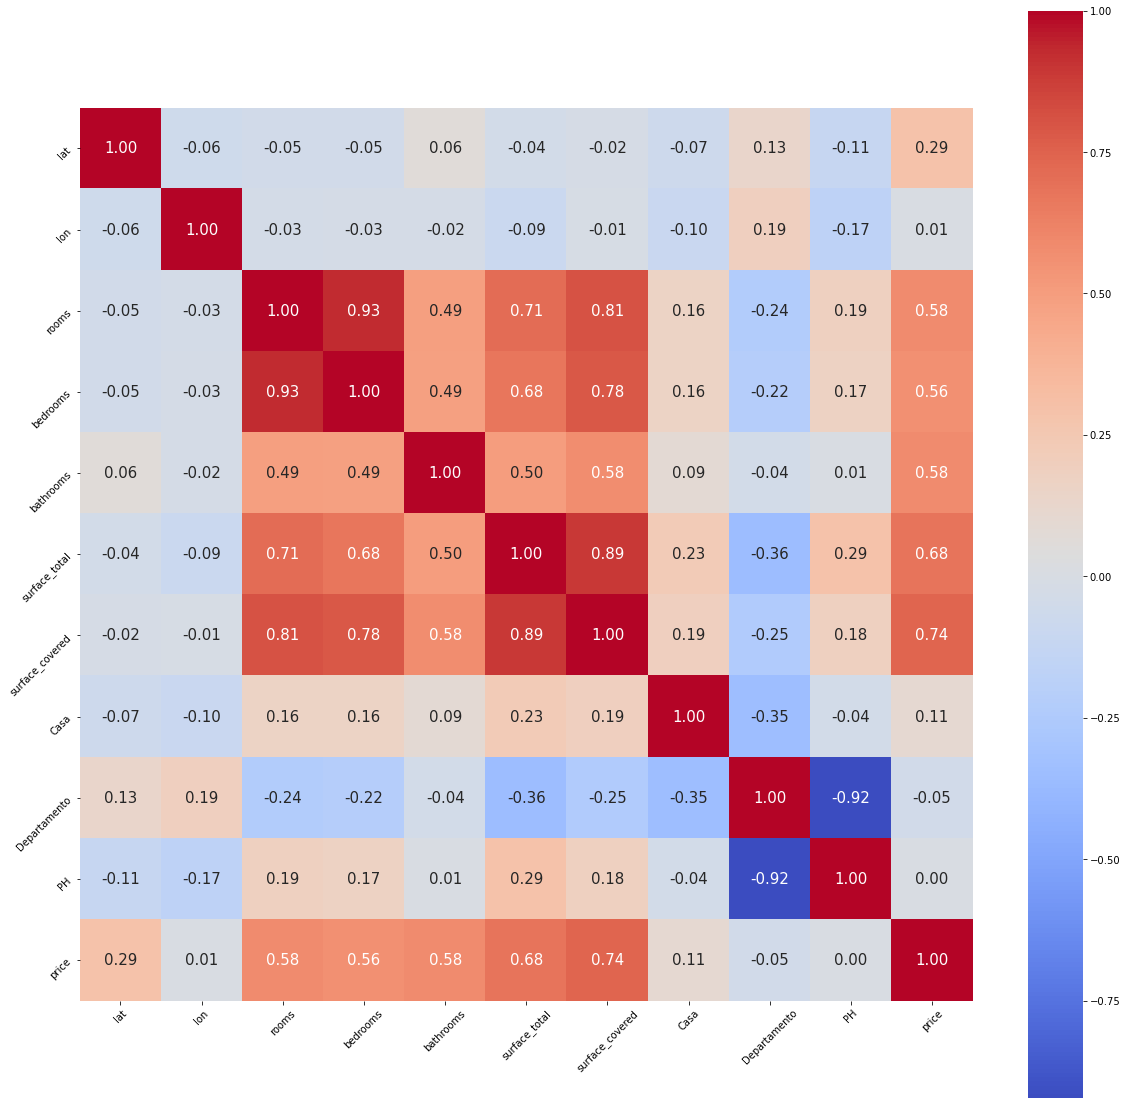

In [55]:
p32 = p31.drop(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque'], axis = 1)

corr = p32.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= p32.columns, 
           yticklabels= p32.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Para visualizar las correlaciones sacamos los campos de Barrios porque sino nos quedaba muy grande nuestro gráfico. Vemos que la variable con mayor correlación con el precio es la de superficie cubierta y después la superficie total.

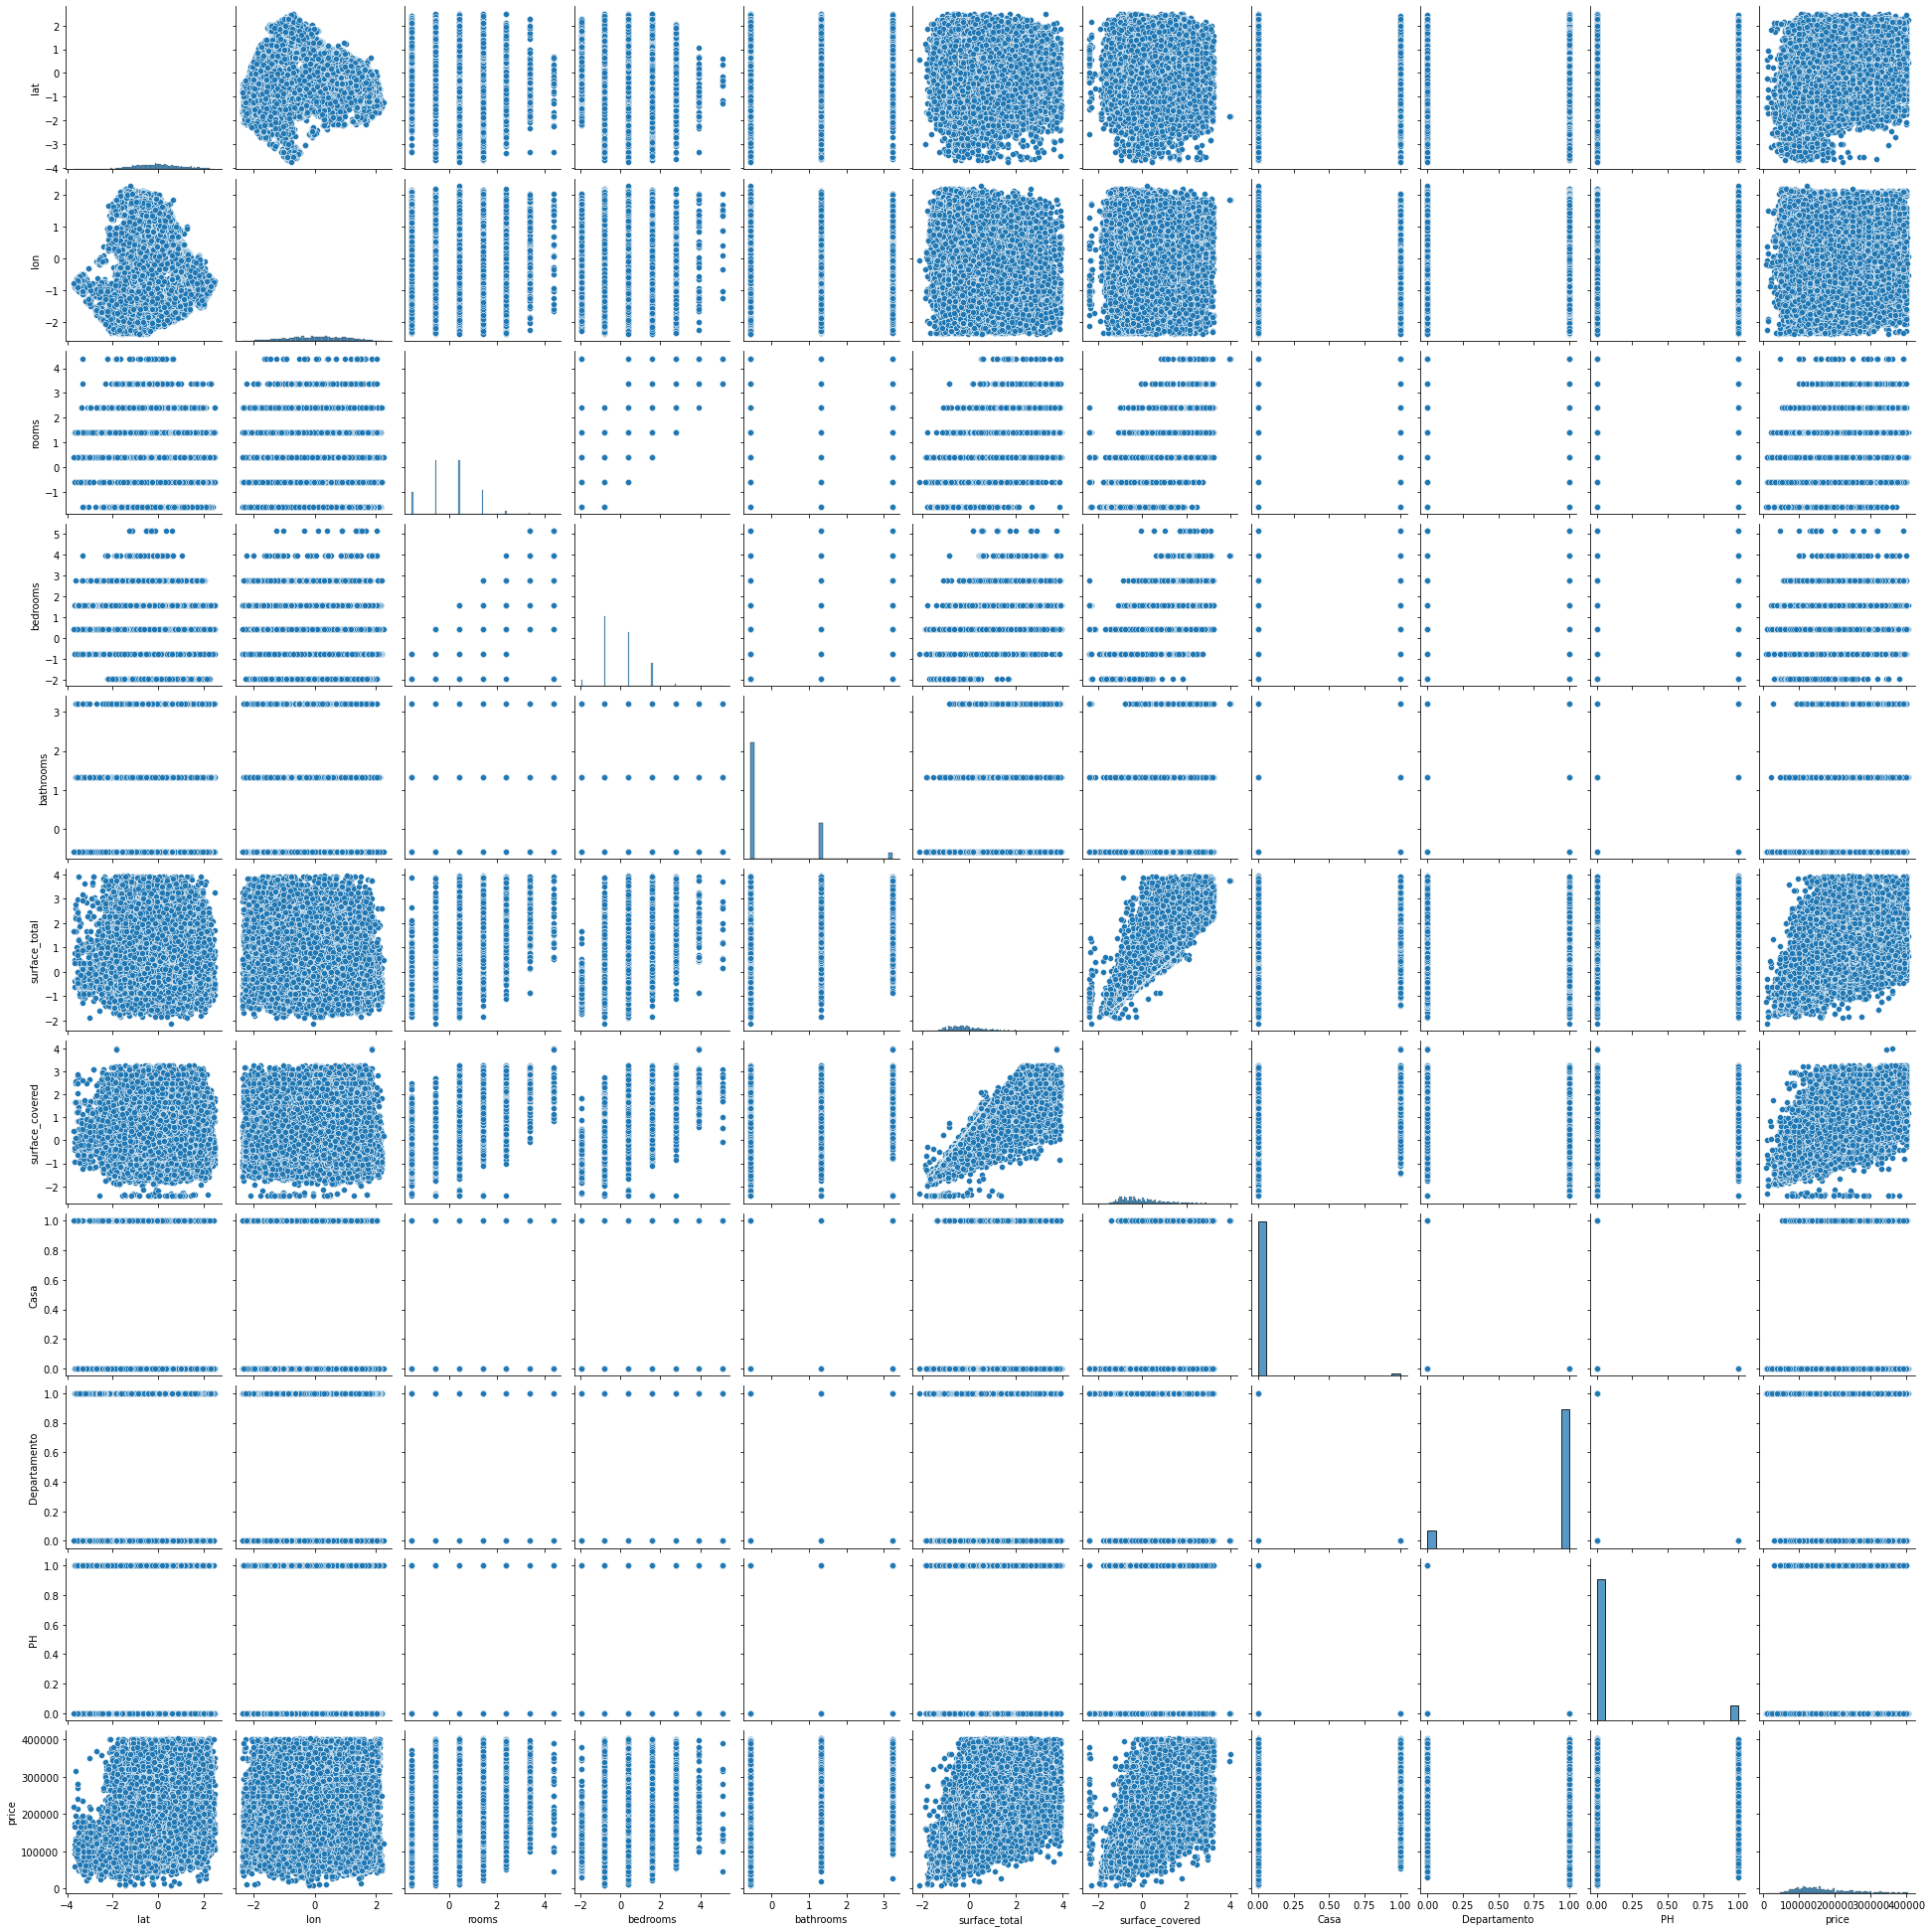

In [56]:
sns.pairplot(p32)

Visualizamos los datos y vemos que las correlaciones son parecidas al Proyecto1 por lo que no vamos a analizarlos en mayor profundidad.

Text(0, 0.5, 'Precio (USD)')

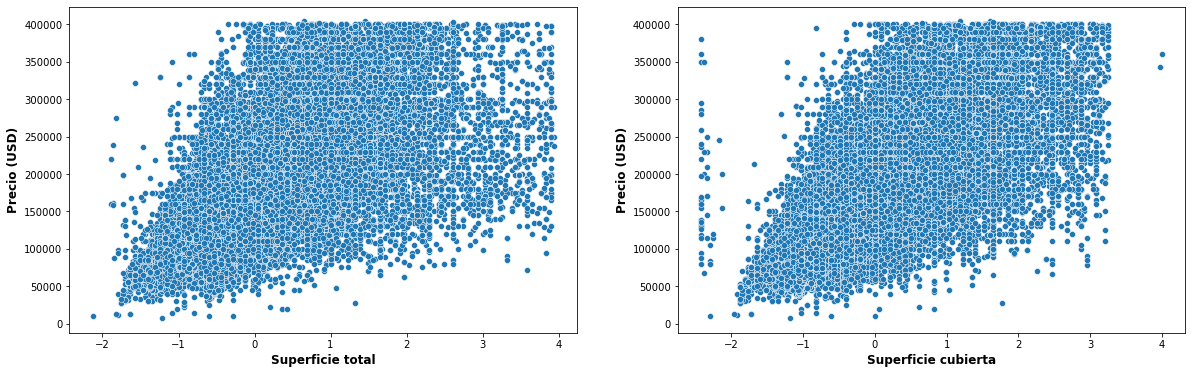

In [57]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="surface_total", y="price", data=p32)
plt.xlabel("Superficie total", fontweight = "black", fontsize = 12)
plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

plt.subplot(1, 2, 2)
sns.scatterplot(x="surface_covered", y="price", data=p32)
plt.xlabel("Superficie cubierta", fontweight = "black", fontsize = 12)
plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

Con estos dos gráficos podemos observar mejor la relación de la superficie total y cubierta con el precio. Observamos que para la superficie total es bastante lineal la relación, para la superficie cubierta, excepto por algunos datos que aparacen a la izquierda también parece bastante lineal la relación.

**REDUCCIÓN DE DIMENSIONAIDAD CON PCA**

In [58]:
p31

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,price
0,-0.308354,-0.105242,-0.577073,-0.779757,-0.565357,-1.214611,-1.188776,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
1,-0.139074,0.771320,-0.577073,-0.779757,-0.565357,-1.150232,-1.106685,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0
2,0.038023,0.740428,-0.577073,-0.779757,1.325698,-0.731774,-0.696232,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132411.0
3,-0.136482,0.924747,-0.577073,-0.779757,-0.565357,-0.860530,-0.790896,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115000.0
4,-0.174280,0.705738,-0.577073,-0.779757,-0.565357,-0.216748,-0.819368,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,5.126022,-0.565357,1.731320,2.747974,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390000.0
54899,-1.830747,-1.449176,4.389697,2.763711,1.325698,1.553653,2.188088,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290000.0
54900,-1.264662,-1.263673,4.389697,5.126022,3.216753,1.175662,2.158874,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000.0
54901,-0.450811,-0.928777,4.389697,-1.960913,3.216753,1.672377,1.826041,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350000.0


Volvemos a visualizar nuesrto dataset con todos nuestros datos incluídos los barrios.

In [59]:
p33 = p31.drop(['price'], axis = 1)
p33

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-0.308354,-0.105242,-0.577073,-0.779757,-0.565357,-1.214611,-1.188776,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.139074,0.771320,-0.577073,-0.779757,-0.565357,-1.150232,-1.106685,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.038023,0.740428,-0.577073,-0.779757,1.325698,-0.731774,-0.696232,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.136482,0.924747,-0.577073,-0.779757,-0.565357,-0.860530,-0.790896,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.174280,0.705738,-0.577073,-0.779757,-0.565357,-0.216748,-0.819368,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,5.126022,-0.565357,1.731320,2.747974,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,-1.830747,-1.449176,4.389697,2.763711,1.325698,1.553653,2.188088,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,-1.264662,-1.263673,4.389697,5.126022,3.216753,1.175662,2.158874,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,-0.450811,-0.928777,4.389697,-1.960913,3.216753,1.672377,1.826041,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para hacer la reducción de dimensionalidad vamos a retirar el target que es el precio.

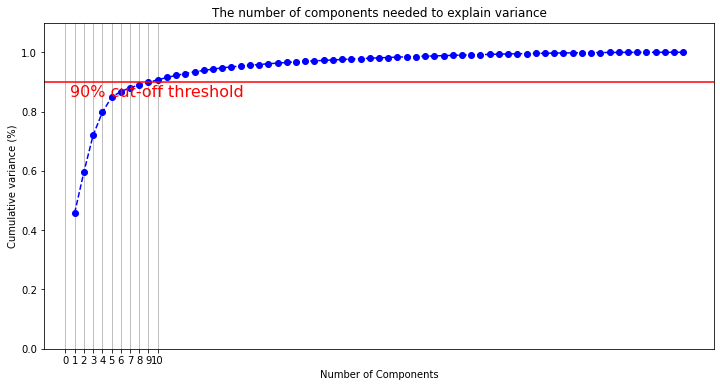

In [60]:
from sklearn.decomposition import PCA

pca = PCA().fit(p33)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 68, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Vamos a realizar una reducción de dimensionalidad con PCA para poder utilizar en nuestros modelos y estudiar su rendimiento. El umbral que ponemos de pérdida de información es de 90%. Vemos que el número de componentes para ese umbral es de 10, por lo que vamos a utilizar el PCA con 10 de n_components.

In [61]:
pca = PCA(n_components = 10)
pca.fit(p33)
p34 = pca.transform(p33)
p35 = pd.DataFrame(p34)
p35

,0,1,2,3,4,5,6,7,8,9
0,-1.922208,0.180907,0.305278,0.076735,-0.588299,0.041327,-0.051084,-0.082839,0.034162,0.178502
1,-1.885407,0.599587,-0.455210,-0.014897,-0.445749,0.105552,-0.098441,-0.061285,0.052392,0.168724
2,-0.844186,0.214793,-0.867963,1.574473,-0.382957,0.229352,-0.112577,-0.093898,0.066984,0.155897
3,-1.615785,0.691348,-0.566020,-0.049452,-0.125112,0.028769,-0.101769,-0.050807,0.002533,0.158862
4,-1.345429,0.567685,-0.335877,-0.054441,0.271764,0.022145,-0.091126,-0.098271,0.385778,0.051703
...,...,...,...,...,...,...,...,...,...,...
54898,6.494806,0.627552,0.824039,-3.329801,-1.631329,0.015897,-0.042404,0.951398,-0.186261,-0.397986
54899,5.756468,0.689904,2.179133,-0.600439,-1.325441,0.203537,0.102110,-0.246750,0.054495,1.180333
54900,7.355329,0.286138,1.345399,0.263998,-3.018501,0.596344,0.095393,-0.163381,-0.156880,-0.369181
54901,4.011486,-0.528576,0.570222,2.075701,0.493012,0.453932,-0.105116,-0.364482,0.671600,4.334098


Visualizamos nuestro nuevo dataset con PCA con 10 columnas en vez de 67, lo cuál disminuye mucho nuestros atributos, y por lo tanto la complejidad del modelo y el tiempo de ejecución. Vamos a guardar los dos datasets, uno en la variable p31 y otro en el p35.

# **MODELOS**

**Modelo Benchmark**

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Medimos nuestro modelo con el RMSE (Raíz del error cuadrado promedio). Mientras más bajo sea el RMSE va a ser mejor nuestro modelo porque vamos a tener menor cantidad de error. Al medir el RMSE tanto en Train como en Test podemos ver que si hay mucha diferencia puede haber overfitting.

Vamos a empezar con un modelo Benchmark de regresón lineal y vamos a observar su rendimiento. Vamos a utilizar dos variables, que son la superficie total y la cubierta con respecto al precio, que por lo que vimos tienen una gran correlación con el precio y son las mismas que usamos en el Proyecto1.

In [63]:
X_p31 = p31[["surface_total", "surface_covered"]]
y_p31 = p31["price"]

Definimos nuestro X y nuestro y. El X van a ser la superficie total y la superficie cubierta. El dataset va a ser el p31, el cuál contiene todos los atributos.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_p31, y_p31, test_size = 0.3, random_state = 42)

Hacemos división train-test split.

In [65]:
linear_p31 = LinearRegression()
linear_p31.fit(X_train, y_train)

LinearRegression()

In [66]:
y_test_pred = linear_p31.predict(X_test)
y_train_pred = linear_p31.predict(X_train)

In [67]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 53304.28594069731
Raíz del error cuadrático medio en Test: 52930.341569255215


Visaulizamos el RMSE de Train y Test, el cuál es mucho menor que nuestro modelo del Proyecto 1, el cuál tenía un RMSE de 218957 y en el de ahora tenemos un RMSE de test de `~53000, cerca de 4 veces menos y mejor que nuestro mejor modelo del Proyeco1 que llegó a tener un RMSE de 75000. Observamos también que la diferencia entre el RMSE de test y train es muy baja, de 400, lo cuál es muy bueno.

**Árbol de Decisión**

In [68]:
tree_p31 = DecisionTreeRegressor(max_depth = 8)

Vamos a utilizar un modelo de Árbol de Decisión para mejorar nuestro resultado. Vamos a empezar con un modelo de árbol de decisión de profuncidad 8 y los otros hiperparámetros en default.

In [69]:
tree_p31.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [70]:
y_test_pred = tree_p31.predict(X_test)
y_train_pred = tree_p31.predict(X_train)

In [71]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 49400.3155299274
Raíz del error cuadrático medio en Test: 50198.12136605624


Observamos que el RMSE en test disminuyó a ~50000, mientras que la 
diferencia entre train y test incrementó a 700. Comparado con nuestro modelo del Proyecto1 mejoró de un 175000 a ~50000.

In [72]:
X_mp7 = p31[["surface_total", "surface_covered", "rooms", "bedrooms", "bathrooms",]]
y_mp7 = p31["price"]

Ahora vamos a evaluar el modelo de árbol de decisión con 5 variables para ver su rendimiento.

In [73]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_mp7, y_mp7, test_size = 0.3, random_state = 42)

In [74]:
tree_mp7 = DecisionTreeRegressor(max_depth = 8)

Seguimos con la profundidad de 8.

In [75]:
def modelo(X_train, X_test, y_train, y_test, modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


In [76]:
modelo(X_train7, X_test7, y_train7, y_test7, tree_mp7)

Raíz del error cuadrático medio en Train: 46660.41830302402
Raíz del error cuadrático medio en Test: 47524.20756473863


Observamos que con los atributos tomados el RMSE de Test mejoró a ~47000 y disminuyó la diferencie entre Train y Test a ~900. Comparado con el modelo del Proyecto1 mejoró de 158000 a ~47000.

In [77]:
X_mp8 = p31.drop(['price'], axis=1)
y_mp8 = p31["price"]

Vamos a utilizar todos los atributos que tenemos de nuestro dataset p31 que tiene los valores encodeados.

In [78]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_mp8, y_mp8, test_size = 0.3, random_state = 42)

In [79]:
tree_mp8 = DecisionTreeRegressor(max_depth = 8)

In [80]:
modelo(X_train8, X_test8, y_train8, y_test8, tree_mp8)

Raíz del error cuadrático medio en Train: 37381.966744442245
Raíz del error cuadrático medio en Test: 38896.793656084636


Agregando todos estos atributo observamos que el RMSE de Test baja a ~39000 y la diferencia entre Train y Test es de ~1500. Este modelo no lo podemos comparar con el Proyecto1 porque no se hizo este encodeado y se tenía menos cantidad de atributos.

In [81]:
X_mp9 = p35
y_mp9 = p31["price"]

Utilizamos el dataset con reducción de dimensionalidad para visualizar el rendimiento comparado a nuestro dataset con todos los valores.

In [82]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_mp9, y_mp9, test_size = 0.3, random_state = 42)

In [83]:
tree_mp9 = DecisionTreeRegressor(max_depth = 8)

In [84]:
modelo(X_train9, X_test9, y_train9, y_test9, tree_mp9)

Raíz del error cuadrático medio en Train: 38609.317493335446
Raíz del error cuadrático medio en Test: 40730.943800977286


Observamos que el RMSE de test empeoró, pero no mucho, pasó de ~39000 a  y la ~41000 diferencia entre Train y Test pasó de ~1500 a ~2000. Es muy baja la diferencia.

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

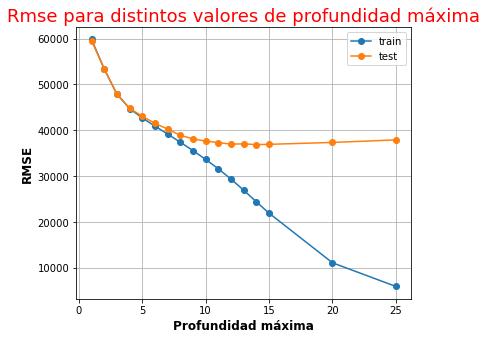

In [85]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train8, y_train8)
    y_train_pred = model.predict(X_train8)
    train_rmse = np.sqrt(mean_squared_error(y_train8, y_train_pred))
    y_test_pred = model.predict(X_test8)
    test_rmse = np.sqrt(mean_squared_error(y_test8, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

Volvemos a utilizar nuestro dataset completo y vemos que desde la profundidad 11 el RMSE de test deja de bajar, por lo que vamos a elegir la profundidad 10 como óptima para el modelo de árbol de decisión.

In [86]:
tree_mp10 = DecisionTreeRegressor(max_depth = 10)

In [87]:
modelo(X_train8, X_test8, y_train8, y_test8, tree_mp10)

Raíz del error cuadrático medio en Train: 33631.554943803036
Raíz del error cuadrático medio en Test: 37607.80008083454


Visualizamos que bajó el valor de RMSE de Test de ~39000 a ~38000, mientras que la diferencia entre Train y Test pasó de 1500 a 4000, por lo que no valdría mucho la pena y se podría buscar un valor entre 8 y 10 para un mejor modelo y tener menos overfitting.

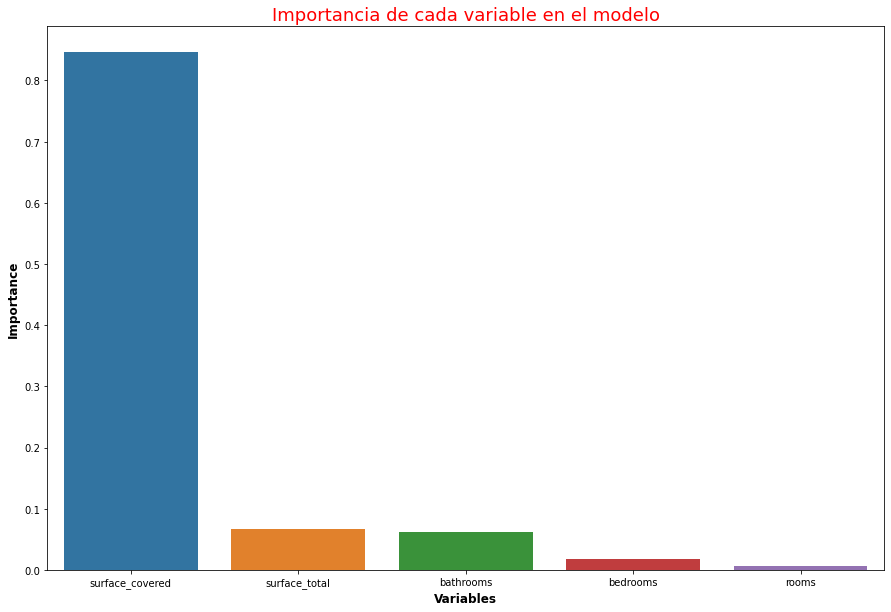

In [88]:
importances = pd.DataFrame(tree_mp7.feature_importances_, 
                           index= X_mp7.columns, 
                           columns=['importance'])

importances.sort_values('importance', ascending=False, inplace=True)

plt.figure(figsize = (15, 10))
sns.barplot(data=importances, x=importances.index, y='importance')
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.ylabel("Importance", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

Visualizamos las variables más importantes para un modelo con 5 features. Observamos que la superficie cubierta es la más imporatante y la superficie total es la segunda. Para este gráfico utilizamos un modelo con 5 features, sacando las de tipo de propiedad y barrios.

**KNN**

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

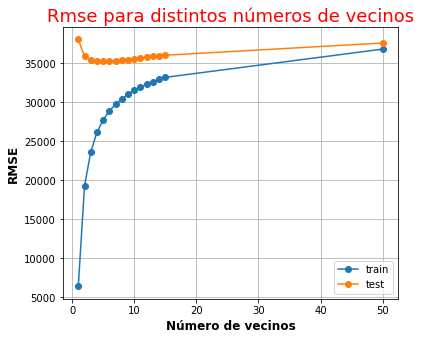

In [89]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train8, y_train8)
    y2_train_pred = model.predict(X_train8)
    train_rmse = np.sqrt(mean_squared_error(y_train8, y2_train_pred))
    y2_test_pred = model.predict(X_test8)
    test_rmse = np.sqrt(mean_squared_error(y_test8, y2_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Ahora hacemos un modelo de KNN con nuestro dataser completo para comparar los resultados. Observamos que desepués del vecino 10 crece mucho el RMSE, así que vamos a tomar el vecino 10 y ver el comportamiento de nuestro modelo.

In [90]:
KNN_mp8 = KNeighborsRegressor(n_neighbors = 10)

In [91]:
modelo(X_train8, X_test8, y_train8, y_test8, KNN_mp8)

Raíz del error cuadrático medio en Train: 31526.080556460623
Raíz del error cuadrático medio en Test: 35566.28273201423


Comparando con nuestro modelo de árbol de decisión el RMSE de Test en KNN da ~35000 y el de árbol de decisión da ~38000. Si comparamos con nuestro modelo de KNN del Proyecto1 este da ~35000, mientras que el del Proyecto1 da 107000. Es importante, sin embargo, tener en cuenta que este modelo lo hacemos con más features. 

In [92]:
modelo(X_train9, X_test9, y_train9, y_test9, KNN_mp8)

Raíz del error cuadrático medio en Train: 31610.295155233627
Raíz del error cuadrático medio en Test: 35305.90064222886


Hacemos el modelo de KNN con 10 vecinos también para el dataset de PCA y observamos que la diferencia es ínfima.

**Estadísticas de los modelos**

In [93]:
final = {"Modelo":["Benchmark", "Ábrol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos", "Vecinos más cercanos", "Vecinos más cercanos"], 
           "Hiper-parámetros":["default", "profundidad = 8", "profundidad = 8", "profunidad = 8", "profundidad = 8", "profundidad = 10", "profundidad = 10", "profundidad = 10", "profundidad = 12",  "n° de vecinos = 10", "n° de vecinos = 10",  "n° de vecinos = 10"], 
           "Variables X": [2, 2, 5, 67, "PCA 10", 67, 5, 9, 9, 67, "PCA 10", 9], "P2 RMSE (test)":["~53000", "~50000", "~47000", "~39000", "~41000", "~38000", "", "", "", "~35000",  "~35000", ""], "P1 RMSE (test)":["~218000", "~175000", "~158000", "", "", "", "~153000", "~79000", "~75000", "", "", "~107000"], "P2 Diferencia RMSE Test-Train":["~400", "~700", "~900", "~1500", "~2000", "~4000", "", "", "", "~4000", "~3500", ""], "P1 Diferencia RMSE Test-Train":["~2000", "~10000", "~19000", "", "", "", "~33000", "~14000", "~23000", "", "", "~12000"]}
pd.DataFrame(final)

,Modelo,Hiper-parámetros,Variables X,P2 RMSE (test),P1 RMSE (test),P2 Diferencia RMSE Test-Train,P1 Diferencia RMSE Test-Train
0,Benchmark,default,2,~53000,~218000,~400,~2000
1,Ábrol de decisión,profundidad = 8,2,~50000,~175000,~700,~10000
2,Árbol de decisión,profundidad = 8,5,~47000,~158000,~900,~19000
3,Árbol de decisión,profunidad = 8,67,~39000,,~1500,
4,Árbol de decisión,profundidad = 8,PCA 10,~41000,,~2000,
5,Árbol de decisión,profundidad = 10,67,~38000,,~4000,
6,Árbol de decisión,profundidad = 10,5,,~153000,,~33000
7,Árbol de decisión,profundidad = 10,9,,~79000,,~14000
8,Árbol de decisión,profundidad = 12,9,,~75000,,~23000
9,Vecinos más cercanos,n° de vecinos = 10,67,~35000,,~4000,


**Conclusión**: 

Los modelos del proyecto 2 con todo el procesamiento de datos mejoraron mucho con respecto al Proyecto1. Podemos ver como en el modelo de Benchmark más simple que es una regresión lineal el error en test es cuatro veces menor. El mejor modelo que obstuvimos en el Proyecto1 es de 75000 de RMSE, en cambio el mejor modelo del Proyecto2 tiene un RMSE de 35000, la mitad. Por otro lado la diferencia de RMSE entre Train y Test de esos dos modelos son, para el del proyecto 1 de 23000, y para el proyecto 2 de 4000, por lo que también muestra menor overfitting el del proyecto 2. 

Otras conclusiones que se pueden sacar es que el modelo de PCA comparado al modelo sin reduccón de dimensionalidad dan RMSE muy parecidos, y la diferencia entre el RMSE de Train y Test también. La única diferencia sustancial sería que el PCA es más rápido de procesar, pero al mismo tiempo perdió más información, al tener un 90% del dataset original.

La mejora del rendimiento de los modelos del Proyecto 2 al rendimeinto de los modelos del proyecto 1 se debe principalmente al mejor procesamiento de los datos, desde la mejora del tratamiento de los outliers, el imputar nulos en vez de borrarlos, el encoding de features muy necesarias para la predicción como los tipos de propiedad y los barrios, y también el escalado de los datos que ayudó a los modelos a una mejor predicción.

# **MODELOS AVANZADOS**

**POLYNOMIAL FEATURES Y REGULARIZACIONES CON RIDGE Y LASSO**

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

Importamos las librerías para Polynomial Features, Ridge y Lasso.

In [95]:
x1= p31['surface_covered']
x2= p31['surface_total']
x3= p31['bathrooms']
x4 = p31['rooms']
x5= p31['bedrooms']
x6= p31['PH']
x7 = p31['Departamento']
x8 = p31['Casa']
y= p31['price']

X = np.vstack((x1,x2,x3,x4,x5,x6,x7,x8)).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lista_rmse_train = []
lista_rmse_test = []

potencias = [1,2,3,4,5]
potencias2 = [6]
potencias3 = [7,8,9,10]

for potencia in potencias:

  poly = PolynomialFeatures(degree = potencia ,include_bias=False)
  modelo_reg_poly = LinearRegression()
  reg_ridge = Ridge(alpha= 1)
  reg_Lasso = Lasso(alpha = 1)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)
  modelo_reg_poly.fit(X_train_poly, y_train)
  reg_ridge.fit(X_train_poly,y_train)
  reg_Lasso.fit(X_train_poly,y_train)

  y_train_pred = modelo_reg_poly.predict(X_train_poly)
  y_train_pred_ridge = reg_ridge.predict(X_train_poly)
  y_train_pred_Lasso = reg_Lasso.predict(X_train_poly)

  y_test_pred = modelo_reg_poly.predict(X_test_poly)
  y_test_pred_ridge = reg_ridge.predict(X_test_poly)
  y_test_pred_Lasso = reg_Lasso.predict(X_test_poly)

  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
  test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

  train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_Lasso))
  test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_Lasso))

  print('\x1b[1;30m', 'Polynomial:', '\033[')
  print("Potencia: ", potencia, "Train: ", train_rmse, "Test: ", test_rmse)
  print('\x1b[1;30m', 'Ridge:', '\033[')
  print("Potencia: ", potencia, "Train: ", train_rmse_ridge, "Test: ", test_rmse_ridge)
  print('\x1b[1;30m', 'Lasso:', '\033[')
  print("Potencia ",potencia, "Train: ", train_rmse_ridge,"Test: ", test_rmse_Lasso, "\n")

for potencia in potencias2:

  poly = PolynomialFeatures(degree = potencia ,include_bias=False)
  modelo_reg_poly = LinearRegression()
  reg_ridge = Ridge(alpha= 1)
  reg_Lasso = Lasso(alpha = 1)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)
  
  reg_ridge.fit(X_train_poly,y_train)
  reg_Lasso.fit(X_train_poly,y_train)

  y_train_pred_ridge = reg_ridge.predict(X_train_poly)
  y_train_pred_Lasso = reg_Lasso.predict(X_train_poly)

  y_test_pred_ridge = reg_ridge.predict(X_test_poly)
  y_test_pred_Lasso = reg_Lasso.predict(X_test_poly)

  train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
  test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

  train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_Lasso))
  test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_Lasso))

  print('\x1b[1;30m', 'Ridge:', '\033[')
  print("Potencia: ", potencia, "Train: ", train_rmse_ridge, "Test: ", test_rmse_ridge)
  print('\x1b[1;30m', 'Lasso:', '\033[')
  print("Potencia ",potencia, "Train: ", train_rmse_ridge,"Test: ", test_rmse_Lasso, "\n")

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662986477332.4062, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  1 Train:  49817.781426119414 Test:  49406.522691857164
 Ridge: [
Potencia:  1 Train:  49817.78157371604 Test:  49406.48573399775
 Lasso: [
Potencia  1 Train:  49817.78157371604 Test:  49406.371873846256 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21299590118366.855, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  2 Train:  48093.59454119433 Test:  48044.61320263094
 Ridge: [
Potencia:  2 Train:  48092.8931253813 Test:  48041.045730524405
 Lasso: [
Potencia  2 Train:  48092.8931253813 Test:  48040.3667801809 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39580218335727.016, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  3 Train:  47275.45545389012 Test:  47402.554421945955
 Ridge: [
Potencia:  3 Train:  47267.05675757242 Test:  47379.2233145104
 Lasso: [
Potencia  3 Train:  47267.05675757242 Test:  47371.29351635731 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41592835773817.414, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  4 Train:  46736.22285750666 Test:  47224.32616690282
 Ridge: [
Potencia:  4 Train:  46697.63311722394 Test:  47115.576362850654
 Lasso: [
Potencia  4 Train:  46697.63311722394 Test:  47135.3545859915 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41364774133785.82, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  5 Train:  46065.6851385932 Test:  32158964820504.074
 Ridge: [
Potencia:  5 Train:  46077.16285818572 Test:  48988.09120929676
 Lasso: [
Potencia  5 Train:  46077.16285818572 Test:  47257.6027426601 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41051062247410.53, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Ridge: [
Potencia:  6 Train:  45318.85344019715 Test:  62767.61662652404
 Lasso: [
Potencia  6 Train:  45318.85344019715 Test:  47184.93854418239 



Utilizamos un modelo avanzado de Polynomial Features y dos modelos de regularización con Lasso y Ridge. Por un problema de falta de campacidad computacional no podemos utilizar todas las features del dataset oroginal, así que vamos a dejar afuera las features de los barrios. El moejor RMSE de Test para todos los modelos se obtiene con una potencia de 4. Después de esa potencia todos los RMSE para Test crecen. El que menos crece es para la regularización con Lasso, que crece 50 desde la potencia 4 hasta la 6. El menor valor de RMSE es de 47000.

In [96]:
x1= p35[0]
x2= p35[1]
x3= p35[2]
x4 = p35[3]
x5= p35[4]
x6= p35[5]
x7 = p35[6]
x8 = p35[7]
x9 = p35[8]
x10 = p35[9]
y= p31['price']

X = np.vstack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lista_rmse_train = []
lista_rmse_test = []

potencias = [1,2,3,4,5]
potencias2 = [6]
potencias3 = [7,8,9,10]

for potencia in potencias:

  poly = PolynomialFeatures(degree = potencia ,include_bias=False)
  modelo_reg_poly = LinearRegression()
  reg_ridge = Ridge(alpha= 1)
  reg_Lasso = Lasso(alpha = 1)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)
  modelo_reg_poly.fit(X_train_poly, y_train)
  reg_ridge.fit(X_train_poly,y_train)
  reg_Lasso.fit(X_train_poly,y_train)

  y_train_pred = modelo_reg_poly.predict(X_train_poly)
  y_train_pred_ridge = reg_ridge.predict(X_train_poly)
  y_train_pred_Lasso = reg_Lasso.predict(X_train_poly)

  y_test_pred = modelo_reg_poly.predict(X_test_poly)
  y_test_pred_ridge = reg_ridge.predict(X_test_poly)
  y_test_pred_Lasso = reg_Lasso.predict(X_test_poly)

  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
  test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

  train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_Lasso))
  test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_Lasso))

  print('\x1b[1;30m', 'Polynomial:', '\033[')
  print("Potencia: ", potencia, "Train: ", train_rmse, "Test: ", test_rmse)
  print('\x1b[1;30m', 'Ridge:', '\033[')
  print("Potencia: ", potencia, "Train: ", train_rmse_ridge, "Test: ", test_rmse_ridge)
  print('\x1b[1;30m', 'Lasso:', '\033[')
  print("Potencia ",potencia, "Train: ", train_rmse_ridge,"Test: ", test_rmse_Lasso, "\n")

for potencia in potencias2:

  poly = PolynomialFeatures(degree = potencia ,include_bias=False)
  modelo_reg_poly = LinearRegression()
  reg_ridge = Ridge(alpha= 1)
  reg_Lasso = Lasso(alpha = 1)

  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)
  
  reg_ridge.fit(X_train_poly,y_train)
  reg_Lasso.fit(X_train_poly,y_train)

  y_train_pred_ridge = reg_ridge.predict(X_train_poly)
  y_train_pred_Lasso = reg_Lasso.predict(X_train_poly)

  y_test_pred_ridge = reg_ridge.predict(X_test_poly)
  y_test_pred_Lasso = reg_Lasso.predict(X_test_poly)

  train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
  test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

  train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_Lasso))
  test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_Lasso))

  print('\x1b[1;30m', 'Ridge:', '\033[')
  print("Potencia: ", potencia, "Train: ", train_rmse_ridge, "Test: ", test_rmse_ridge)
  print('\x1b[1;30m', 'Lasso:', '\033[')
  print("Potencia ",potencia, "Train: ", train_rmse_ridge,"Test: ", test_rmse_Lasso, "\n")

 Polynomial: [
Potencia:  1 Train:  43623.19700301723 Test:  43540.298909179175
 Ridge: [
Potencia:  1 Train:  43623.19714547578 Test:  43540.27771316739
 Lasso: [
Potencia  1 Train:  43623.19714547578 Test:  43540.31890837908 

 Polynomial: [
Potencia:  2 Train:  40214.45277150997 Test:  40516.57420509651
 Ridge: [
Potencia:  2 Train:  40214.56966920575 Test:  40516.65196062419
 Lasso: [
Potencia  2 Train:  40214.56966920575 Test:  40516.82941455679 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26320478841715.754, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  3 Train:  37948.161967196866 Test:  38570.193628528265
 Ridge: [
Potencia:  3 Train:  38045.86708854485 Test:  38692.312987165606
 Lasso: [
Potencia  3 Train:  38045.86708854485 Test:  38700.64727120288 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24960968485400.63, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  4 Train:  35342.7829759671 Test:  38685.4478355594
 Ridge: [
Potencia:  4 Train:  36107.45208805087 Test:  37931.5401576894
 Lasso: [
Potencia  4 Train:  36107.45208805087 Test:  37870.39832770642 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22856175279050.3, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Polynomial: [
Potencia:  5 Train:  31788.04893189637 Test:  385069.0552987652
 Ridge: [
Potencia:  5 Train:  33715.679124322065 Test:  44323.76205538751
 Lasso: [
Potencia  5 Train:  33715.679124322065 Test:  40969.77349959422 



C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20711451773694.85, tolerance: 24053020765.306736
  model = cd_fast.enet_coordinate_descent(


 Ridge: [
Potencia:  6 Train:  30942.442380594235 Test:  160710.20588994195
 Lasso: [
Potencia  6 Train:  30942.442380594235 Test:  64275.00396857504 



Vemos como para el PCA mejoró el RMSE. El mejor rendimiento para el PolynomialFeatures es para potencia 3, el de Lasso y Ridge los mejores RMSE son para potencia 4. En comparación con el dataset original mejoró de ~47000 a ~38000. Esto principalmente porque no pudimos tomar todas las features del dataset original por falta de capacidad computacional, en cambio el PCA si toma todas las features y se pueden usar por ser menos cantidad que el dataset encodeado.

**RANDOM FOREST**

In [97]:
from sklearn.ensemble import RandomForestRegressor

1 59019.015876987396 58783.3114563943
5 41212.338915653585 41500.45351142953
10 31415.681603323883 34799.11518687115
15 20066.825421325124 30386.10720837132
20 13329.312217125109 28832.639806655472
25 11693.658612883355 28622.11393836612
30 11466.184892280786 28578.017593675995


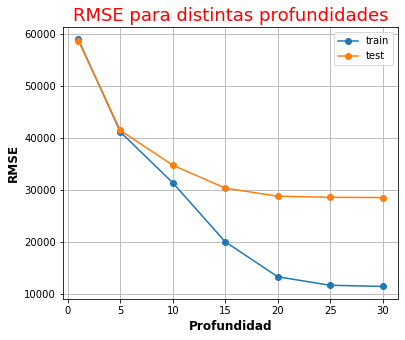

In [98]:
X = X_mp8
y = y_mp8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lista_rmse_train = []
lista_rmse_test = []

depth = [1,5,10,15,20,25,30]

for m in depth:
  bosque = RandomForestRegressor(max_depth=m)
  bosque.fit(X_train, y_train)
  y_train_pred = bosque.predict(X_train)
  y_test_pred = bosque.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(m, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Hacemos modelos de RandomForest para diferentes profundidades con nuestro dataset encodeado. Observamos que a partir de 20 de profundidad el RMSE de Test deja de bajar, sin embargo, en 15 ya hay mucha diferencia entre Train y Test, de 10000, por lo que nos vamos a quedar con una profundidad de 10 que nos da un RMSE de Test de ~35000 y una diferencia con el RMSE de Train de 3000.

1 60435.936244199904 60558.645813985706
5 43456.43376208879 43785.39543964201
10 30429.057919876712 34682.027789665975
15 18230.37873159893 30508.335709557916
20 12854.820565928405 29515.41109829759
25 11861.240330318573 29489.815951489938
30 11749.49264227975 29432.86751352292


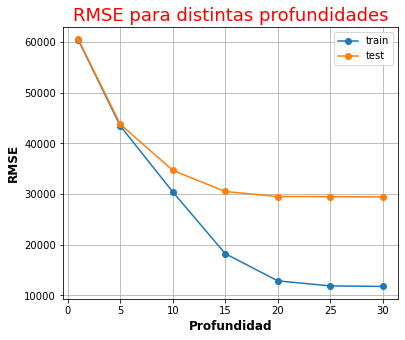

In [99]:
X = X_mp9
y = y_mp9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lista_rmse_train = []
lista_rmse_test = []

depth = [1,5,10,15,20,25,30]

for m in depth:
  bosque = RandomForestRegressor(max_depth=m)
  bosque.fit(X_train, y_train)
  y_train_pred = bosque.predict(X_train)
  y_test_pred = bosque.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(m, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Con el dataset con PCA el modelo de RandomForest se comporta muy parecido al dataset completo, aunque la diferencia entre el RMSE de Train y Test es un poco mayor. Para la profunidad 10 el RMSE para Test es de ~35000, casi igual que para el dataset original.

**XGBoost**

In [100]:
import xgboost as xgb

[11:44:44] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


1 39271.19278241785 39272.94860793989
[11:44:44] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


5 30025.479172742344 33078.00202905393
[11:44:46] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verific

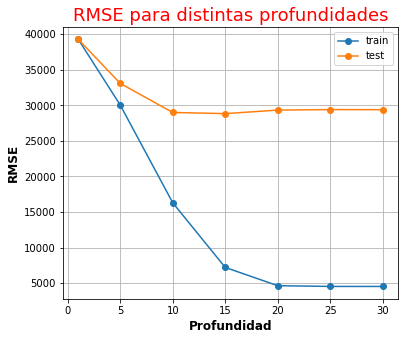

In [101]:
X = X_mp8
y = y_mp8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lista_rmse_train = []
lista_rmse_test = []

depth = [1,5,10,15,20,25,30]

for d in depth:
  XGBR = xgb.XGBRegressor(max_depth=d, silent = True)
  XGBR.fit(X_train, y_train)
  y_train_pred = XGBR.predict(X_train)
  y_test_pred = XGBR.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(d, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Hacemos modelos de XGBoost para nuestro dataset encodeado para diferentes profunidades. Para el modelo de XGBoost el resultado es diferente al RandomForest. La diferencia entre Train y Test empieza a crecer con profundidades más bajas. Vemos que con una profundidad de 15 se estailiza el RMSE para Test. En una profunidad de 5 tiene un RMSE de ~35000, vamos a probar con profunidades entre 5 y 10 para encontrar un modelo en el cuál la diferencia entre Train y Test sea de ~3000.



[11:46:07] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


1 40673.11175122824 41035.36357162014
[11:46:08] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


5 29982.191161514464 34104.510701078936
[11:46:11] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verifi

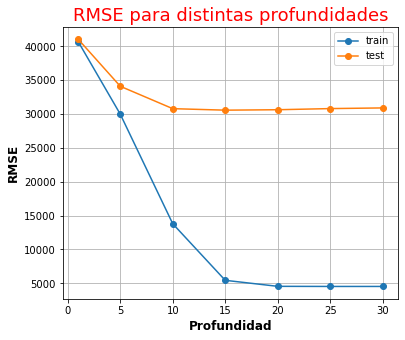

In [102]:
X = X_mp9
y = y_mp9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lista_rmse_train = []
lista_rmse_test = []

depth = [1,5,10,15,20,25,30]

for d in depth:
  XGBR = xgb.XGBRegressor(max_depth=d, silent = True)
  XGBR.fit(X_train, y_train)
  y_train_pred = XGBR.predict(X_train)
  y_test_pred = XGBR.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(d, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Observamos que el comportamiento del modelo de XGBoost para el dataset de PCA es casi igual al del dataset original.

[11:47:39] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


5 30025.479172742344 33078.00202905393
[11:47:42] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


6 27395.606548887514 31980.06232315761
[11:47:45] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verifi

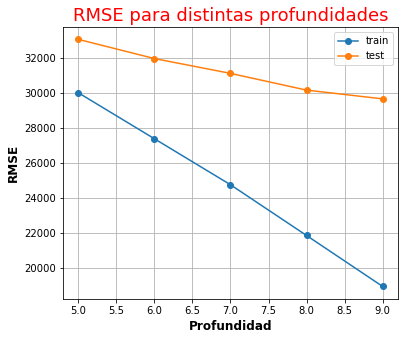

In [103]:
X = X_mp8
y = y_mp8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lista_rmse_train = []
lista_rmse_test = []

depth = [5,6,7,8,9]

for d in depth:
  XGBR = xgb.XGBRegressor(max_depth=d, silent = True)
  XGBR.fit(X_train, y_train)
  y_train_pred = XGBR.predict(X_train)
  y_test_pred = XGBR.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(d, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Buscamos visualizar los RMSE para las profundidades entre 5 y 10. Al ser la profunidad de 7 la que tiene una diferencia de RMSE de aproximadamente 3000 vamos a elegir esa profunidad para el modelo. El RMSE de Test sería de 33000.

[11:47:58] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


5 29982.191161514464 34104.510701078936
[11:48:00] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


6 27298.40034217656 33275.90274375949
[11:48:02] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verifi

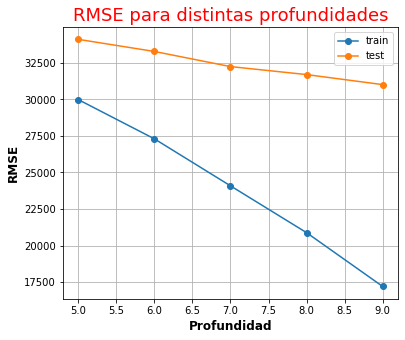

In [104]:
X = X_mp9
y = y_mp9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lista_rmse_train = []
lista_rmse_test = []

depth = [5,6,7,8,9]

for d in depth:
  XGBR = xgb.XGBRegressor(max_depth=d, silent = True)
  XGBR.fit(X_train, y_train)
  y_train_pred = XGBR.predict(X_train)
  y_test_pred = XGBR.predict(X_test) 
  
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print(d, train_rmse, test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Vemos que para el PCA la mejor profundidad para obtener una diferencia de RMSE de aproximadamente 3000 es la de 6. El RMSE de Test sería de 34000.

In [105]:
final2 = {"Modelo":["Benchmark", "Ábrol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos", "Vecinos más cercanos", "Polinomial Features", "Polinomial Features", "Ridge", "Ridge", "Lasso", "Lasso", "RandomForest", "RandomForest", "XGBoost", "XGBoost"], 
           "Hiper-parámetros":["default", "profundidad = 8", "profundidad = 8", "profunidad = 8", "profundidad = 8", "profundidad = 10",  "n° de vecinos = 10", "n° de vecinos = 10", "potencia = 3", "potencia = 4", "potencia = 4", "potencia = 4", "potencia = 4", "potencia = 4", "profunidad = 10", "profundidad = 10", "profunidad = 7", "profundidad = 6"], 
           "Variables X": [2, 2, 5, 67, "PCA 10", 67, 67, "PCA 10", 8, "PCA 10", 8, "PCA 10", 8, "PCA 10", 67, "PCA 10", 67, "PCA 10"],
           "P2 RMSE (test)":["~53000", "~50000", "~47000", "~39000", "~41000", "~38000", "~35000", "~35000", "~47000", "~39000", "`~47000", "~38000", "~47000", "~38000", "~35000", "~35000", "~33000", "~34000"],
           "P2 Diferencia RMSE Test-Train":["~400", "~700", "~900", "~1500", "~2000", "~4000", "~4000", "~3500", "~400", "~3000", "~400", "~2000", "~400", "~2000", "~3000", "~4000", "~3000", "~3000"]}
pd.DataFrame(final2)

,Modelo,Hiper-parámetros,Variables X,P2 RMSE (test),P2 Diferencia RMSE Test-Train
0,Benchmark,default,2,~53000,~400
1,Ábrol de decisión,profundidad = 8,2,~50000,~700
2,Árbol de decisión,profundidad = 8,5,~47000,~900
3,Árbol de decisión,profunidad = 8,67,~39000,~1500
4,Árbol de decisión,profundidad = 8,PCA 10,~41000,~2000
5,Árbol de decisión,profundidad = 10,67,~38000,~4000
6,Vecinos más cercanos,n° de vecinos = 10,67,~35000,~4000
7,Vecinos más cercanos,n° de vecinos = 10,PCA 10,~35000,~3500
8,Polinomial Features,potencia = 3,8,~47000,~400
9,Polinomial Features,potencia = 4,PCA 10,~39000,~3000


Podemos observar que nuestros modelos mejoraron con RandomForest y XGBoost, mientrars que con PolynomialFeatures obtuvimos bastantes buenos modelos también. Los mejores modelos se obtuvieron con KNN, RandomForest y XGBoost. 

Algo interesante para observar es como XGBoost y RandomForest obtienen su mejor rendimiento con profunidades diferentes. Esto se debe al rendimiento propio del bagging y el boosting. En bagging cada árbol suele ser profundo y obtiene sus mejores rendimeintos con mayor profunidad. En cambio, para bagging cada árbol es poco profundo por lo que obtiene sus mejores rendimientos con menor profundidad. 

# **OPTIMIZACIÓN DE HIPERPARAMETROS**

Los modelos que vamos a estar optimizando son los de RandomForest y los de XGBoost que fueron los que mejor resultados dieron en cuanto al RMSE, aunque los modelos de KNN también se obtuvieron muy buenos rendimientos, parecidos al RandomForest. Para ello vamos a utilizar solamente el PCA ya que preferimos un mejor rendimiento computacional para poder procesar nuestra optimización.

 **VALIDACIÓN CRUZADA**

In [106]:
from sklearn.model_selection import cross_validate

1 60131.29675967098 63063.79939507629
5 43261.59595222666 51312.722797520175
10 30283.90793031112 44194.5931246103
15 18187.713176200094 42932.261025779626
20 12486.714024146244 42631.81884529037
25 11392.228299966633 42659.36482324844
30 11272.362104122045 42604.23948990133


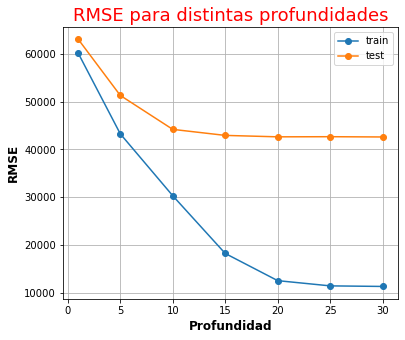

In [107]:
X = X_mp9
y = y_mp9

lista_rmse_train = []
lista_rmse_test = []

depth = [1,5,10,15,20,25,30]

for m in depth:
  bosque = RandomForestRegressor(max_depth = m )
  bosque_scores = cross_validate(bosque, X, y, cv=4, scoring ='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1) 

  train_rmse = np.mean(bosque_scores['train_score']) *-1
  test_rmse = np.mean(bosque_scores['test_score']) *-1

  print(m, train_rmse,  test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Utilizamos la validación cruzada con el RandomForest y observamos como se estabiliza en la profunidad 10. Los RMSE obtenidos y las diferencias de RMSE comparados a nuestros modelos anteriores en peor. Con la validación cruzada nos aseguramos un resultado más acorde aunque nuestras méticas empeoren. Para la profunidad 10 obtuvimos un RMSE de ~44000 y una diferencia de RMSE Train-Test de ~13000.

1 40303.352011152776 43847.98683678679
5 29311.871409373263 41737.94950077109
10 14105.66975553581 45283.61506950053
15 5910.503139487616 45966.14817343862
20 4960.874262634708 46123.950137547436
25 4938.794402634207 46116.81368326268
30 4938.635623301213 46380.58711784315


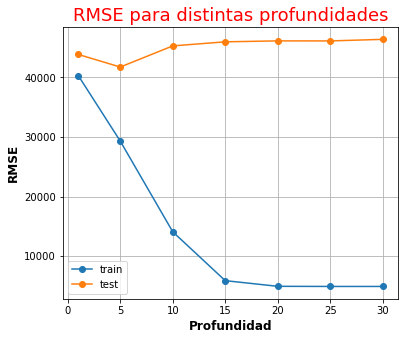

In [108]:
X = X_mp9
y = y_mp9

lista_rmse_train = []
lista_rmse_test = []

depth = [1,5,10,15,20,25,30]

for m in depth:
  XGBR = xgb.XGBRegressor(max_depth=m, silent = True)
  XGBR_scores = cross_validate(XGBR, X, y, cv=4, scoring ='neg_root_mean_squared_error', return_train_score=True, n_jobs = -1) 

  train_rmse = np.mean(XGBR_scores['train_score']) *-1
  test_rmse = np.mean(XGBR_scores['test_score']) *-1

  print(m, train_rmse,  test_rmse)

  lista_rmse_train.append(train_rmse)
  lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(depth, lista_rmse_train,'o-',label='train' )
plt.plot(depth, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("RMSE para distintas profundidades", fontsize = 18, color = "r")

plt.show()

Utilizamos la validación cruzada con el XGBoost y observamos como la mejor profunidad es de 5, después de esa profundidad el RMSE en test empieza a crecer. Al igual que la optimización con RandomForest, esta optimización con validación cruzada para XGBoost también empeoró las métricas. Siendo en la profundidad 5 el RMSE de Test de ~42000 y la diferencia de RMSE Train-Test de ~9000, mejor que nuestro RandomForest.


**RANDOM SEARCH**

In [109]:
from sklearn.model_selection import RandomizedSearchCV

Procedemos a hace una optimización con RandomSearch para nuestro modelo de XGBoost y RandomForest.

In [110]:
param_distributions = {"max_depth": np.arange(1, 26,1),
              "min_child_weight": np.arange(1,10,1),
              "gamma": np.arange(0,0.5,0.1)}
scoring = 'neg_root_mean_squared_error'

Para el modelo de XGBoost elegimos como parametros a optimizar los de max_depth, min_child_weight y gamma, por considerarlos lo más importantes. Por falta de capacidad computacional no agregamos más. Como medida de scoring vamos a seguir con el RMSE.

In [111]:
xgbr = xgb.XGBRegressor(seed=0)
random_xgbr = RandomizedSearchCV(estimator=xgbr, param_distributions=param_distributions, n_jobs=-1, cv=4, scoring=scoring)

El RandomSearch puede utilizar también validación cruzada, la cuál vamos a utilizar con un factor de 4.

In [112]:
X = X_mp9
y = y_mp9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [113]:
random_xgbr.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, seed=0,
                                          subsample=None, 

In [114]:
print(random_xgbr.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=18,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [115]:
print(random_xgbr.best_params_)

{'min_child_weight': 6, 'max_depth': 18, 'gamma': 0.1}


Observamos los parámetros para el modelo más optimizado por RandomSearch que son min_child_weight de 6, max_depth de 24 y gamma de 0.2.

In [116]:
y_train_pred = random_xgbr.predict(X_train)
y_test_pred = random_xgbr.predict(X_test)

In [117]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 6436.838683679303
Raíz del error cuadrático medio en Test: 30472.119513359223


Observamos el RMSE para nuestro mejor de modelo de XGBoost con RandomSearch. Observamos un RMSE de Test de ~29000 mejor que todos nuetros modelos anteriores, sin embargo observamos una diferencia de RMSE de Train-Test de ~22000, lo cuál nos parece mucho y puede sobreajustar.

In [118]:
param_distributions = {
    "max_depth": np.arange(1,31,1),
    "min_samples_split": np.arange(6,21,2),
    "max_features": np.arange(2,13,1),
    "n_estimators": np.arange(100,1100,100)
}
scoring = 'neg_root_mean_squared_error'

Cambiamos los parámetros para usar el RandomForest. En este caso vamos a utilizar los parámetros de max_depth, min_samples_split, max_features y n_estimators por parecernos los mejores parámetros. No utilizamos todos por falta de poder computacional. El scoring que utilizamos sigue siendo el RMSE.

In [119]:
rfr = RandomForestRegressor()
random_rfr = RandomizedSearchCV(estimator = rfr, param_distributions=param_distributions, cv = 4, n_jobs = -1, scoring=scoring)

También utilizamos cross validation de 4.

In [120]:
random_rfr.fit(X_train, y_train)

C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-49749.49346095 -36103.34338039 -31441.71972431 -35261.4322801
 -46527.94715625 -31161.53376441             nan             nan
 -46900.93214573 -32183.19759879]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'min_samples_split': array([ 6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   scoring='neg_root_mean_squared_error')

In [121]:
print(random_rfr.best_estimator_)

RandomForestRegressor(max_depth=29, max_features=8, min_samples_split=10,
                      n_estimators=300)


In [122]:
print(random_rfr.best_params_)

{'n_estimators': 300, 'min_samples_split': 10, 'max_features': 8, 'max_depth': 29}


Observamos los mejores parámetros de nuestro RandomForest optimizado y vemos que son n_estimators: 800, min_samples_split: 12, max_features: 9 y max_depth: 27.

In [123]:
y_train_pred = random_rfr.predict(X_train)
y_test_pred = random_rfr.predict(X_test)

In [124]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 16461.83029765687
Raíz del error cuadrático medio en Test: 29868.458086921702


Observamos que el RMSE de Test es de ~30000, mejor que nuestros modelos 
anteriores y la difercia de Train-Test de ~13000. Con respecto al XGBoost optimizado es apenas peor pero tiene mucha menos diferencia Train-Test.

In [125]:
final3 = {"Modelo":["RandomForest", "RandomForest Optimizado", "XGBoost", "XGBoost Optimizado"], 
           "Hiper-parámetros":["profunidad = 10", "n_estimators: 800/min_samples_split: 12/max_features: 9/ profunidad: 27", "profunidad = 7", "min_child_weight: 6/profundidad: 24/gamma: 0.2"], 
           "Variables X": ["PCA 10", "PCA 10", "PCA 10", "PCA 10"],
           "P2 RMSE (test)":["~35000", "~30000",  "~34000", "~29000"],
           "P2 Diferencia RMSE Test-Train":["~4000", "~13000", "~3000", "~20000"]}
pd.DataFrame(final3)

,Modelo,Hiper-parámetros,Variables X,P2 RMSE (test),P2 Diferencia RMSE Test-Train
0,RandomForest,profunidad = 10,PCA 10,~35000,~4000
1,RandomForest Optimizado,n_estimators: 800/min_samples_split: 12/max_fe...,PCA 10,~30000,~13000
2,XGBoost,profunidad = 7,PCA 10,~34000,~3000
3,XGBoost Optimizado,min_child_weight: 6/profundidad: 24/gamma: 0.2,PCA 10,~29000,~20000


Según lo vizualizado en todos estos modelos y los modelos optimizados elegimos quedarnos con el XGBoost optiizado al tener el RMSE más bajo y una diferencia de 4000 con repecto al RMSE del RandomForest Optimizado. Lo único que no es favorable es la diferencia de Train-Test de ~22000, que nos parece muy alta.

# ***INTERPRETACION DE MODELOS***

Para al interpretación de los modelos vamos a usar el XGBR optimizado con los hiperparámetros que obtuvimos y viendo que resultados nos dan cambiandolos un poco.

**IMPORTANCIA DE VARIABLES**

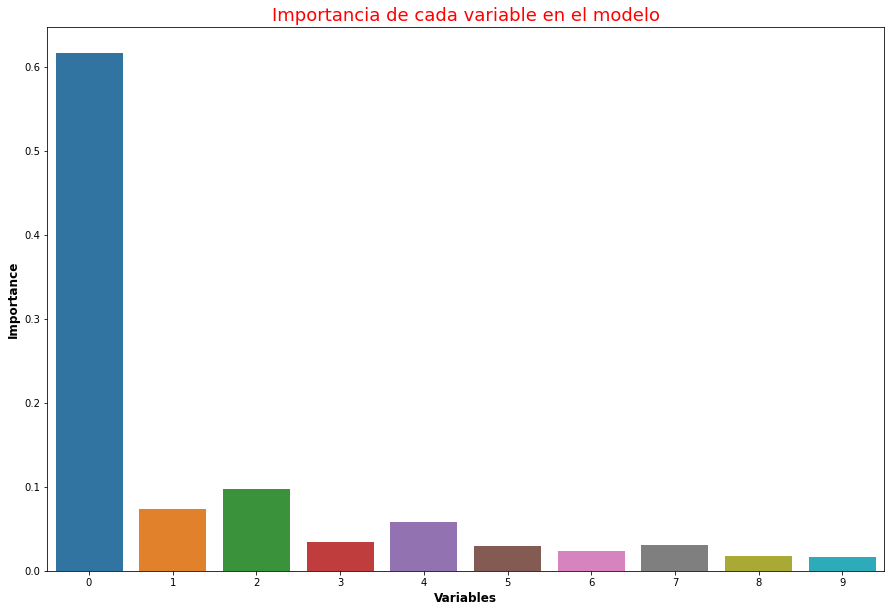

In [126]:
xgbr = xgb.XGBRegressor(min_child_weight = 6, max_depth = 24, gamma = 0.2)
xgbr.fit(X_train, y_train)

importances = pd.DataFrame(xgbr.feature_importances_, 
                           index= X_mp9.columns, 
                           columns=['importance'])

importances.sort_values(by = 'importance', ascending=False, inplace=True)


plt.figure(figsize = (15, 10))
sns.barplot(data=importances, x=importances.index, y='importance')
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.ylabel("Importance", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

Visualizamos la impotancia de las variables de nuesto PCA en el modelo. Al ya no tener los nombres de nuestras columnas originales no podemos decir cuál tiene más impotancia en este modelo, sino el número de columna de nuestra PCA. La importancia de las features para un modelo con 5 features lo vimos más arriba y vimos que el surface_covered tiene más preponderancia, seguido por el surface_total.

In [127]:
xgbr1 = xgb.XGBRegressor(min_child_weight = 1, max_depth = 24, gamma = 0.2)
xgbr1.fit(X_train, y_train)

y_train_pred = xgbr1.predict(X_train)
y_test_pred = xgbr1.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 4538.969729840975
Raíz del error cuadrático medio en Test: 30911.673878664285


Ponemos los min_child_weight en 1 y dejamos los demás hiperparámetros igual y observarmos los resultados. El RMSE de Test queda muy parecido en 29000 y la diferencia entre Train y test pasa a 25000.

In [128]:
xgbr2 = xgb.XGBRegressor(min_child_weight = 6, max_depth = 12, gamma = 0.2)
xgbr2.fit(X_train, y_train)

y_train_pred = xgbr2.predict(X_train)
y_test_pred = xgbr2.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 11918.027442483872
Raíz del error cuadrático medio en Test: 30424.864918930358


Ponemos el max_depth en la mitad y dejamos los demás hiperparámetros igual y observarmos los resultados. El RMSE de Test creció muy poco a 30000 y la diferencia entre Train-Test disminuyó a 13000.

In [129]:
xgbr3 = xgb.XGBRegressor(min_child_weight = 6, max_depth = 24, gamma = 4)
xgbr3.fit(X_train, y_train)

y_train_pred = xgbr3.predict(X_train)
y_test_pred = xgbr3.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 4983.229624645903
Raíz del error cuadrático medio en Test: 30664.302098063716


Ponemos el gamma en 4 y los demás hiperparámetros los dejamos igual. Vemos como empeora el RMSE se mantiene parecido y no hay mucho cambio.

De todos los hiperparámetros que cambiamos obersvamos que el que mayor influencia tuvo en el modelo es el max_depth, espcialmente para la diferencia entre Train y Test. Esto se debe a que un modelo con mayor prounidad puede darnos por poco un mejor RMSE, pero hacer mucho más overfitting.

**DISTRIBUCION DE ERRORES**

Error absoluto medio en Train: 1304.2178562618512
Error absoluto medio en Test: 19001.58749883792
Raíz del error cuadrático medio en Train: 4538.969729840975
Raíz del error cuadrático medio en Test: 30911.673878664285


C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarodriguez\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Valores predichos del Precio (USD)')

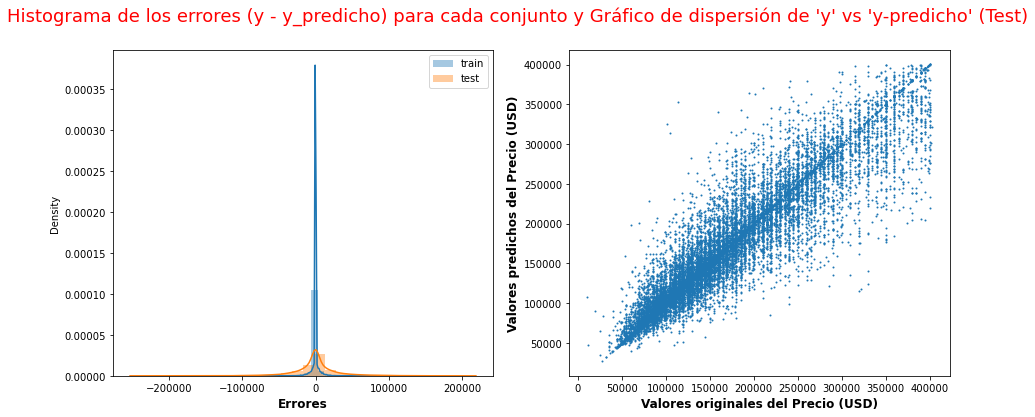

In [130]:
    xgbr = xgb.XGBRegressor(min_child_weight = 6, max_depth = 24, gamma = 0.2)
    xgbr.fit(X_train, y_train)

    y_train_pred = xgbr1.predict(X_train)
    y_test_pred = xgbr1.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    print(f'Error absoluto medio en Train: {train_mae}')
    print(f'Error absoluto medio en Test: {test_mae}')

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
    print(f'Raíz del error cuadrático medio en Test: {test_rmse}')  

    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)

Observamos la distribuciòn de los errores. Observamos como en Test los errores se concentran màs a cuanto mayor es el precio del inmueble. Predice muy bien para los precios menores y a medida que incrementa los errores incrementan y se alejan màs del valor real. Esto se debe a que la varible màs imoprtante para el modelo es la superficie cubierta. Los departamentos màs caros tienen una superficie cubierta a los màs baratos, pero la gran diferencia en su precio es por el barrio donde se encuentra el inmueble. Para mejorar el modelo necesitarìamos que la variable de barrio sea màs importante para predecir los precios. Podemos observar tambièn que tenemos un MAE de 18000 para Test, lo cuàl teniendo en cuenta que la distribuciòn de errores es mayor desde 200000 a 400000, se puede decir que el modelo responde con un bajo ìndice de error.

Observamos que el RMSE mejoró mucho con respecto al Proyecto1. Todavía se podría mejorar más el procesamiento de datos y creemos que nos daría mejores modelos.El mejor modelo que obtuvimos fue un XGBoost optimizado con un RMSE de 29000 y una diferencia Train-Test de 22000. Mejoró un poco con respecto al XGBoost sin optimizar, pero al mismo tiempo empeoró mucho la diferencia entre Train-Test, lo cuál nos lleva a pensar que podría caer en overfitting. Sería bueno explorar otros hiperparámetros para buscar evitar esto.

# **CONCLUSIONES**

Mejoraron mucho nuestros modelos con respecto a los modelos del Proyecto 1. Obtuvimos un modelo con un muy buen RMSE de 29000, sin embargo, una diferncia de Train-Test de 22000. Creemos que se podría mejorar esta métrica, tanto explorando otros hiperparámetros, como también haciendo un Grid Search, para ello necesitamos mayor poder computacional. También creemoso que se podría mejorar las métricas mejorando aún más la preparación de los datasets para los modelos. 

El PCA nos ayudó mucho a mejorar los tiempos y el rendimiento computacional de la ejecución de los modelos, sin embargo, sabemos que se pierde un 10% de data y también los nombres de las columnas para la importancia de las features. Optamos por este camino para poder utilizar la optimización de mejor manera. Con un poder computacional mejor se podría utilizar el dataset escalado.

Creemos que el escalado de los datos así como todo el preprocesamiento fue lo que más influyó en los resultados, por lo que sería bueno seguir eplorando al respecto. 

Las features que pudimos ver que más infuenciaron con un modelo de 5 features de árbol de decisión fueron la superficie cubierta y la superficie total, lo cuál concuerda también con lo visto en el proyecto 1.

Algunas de las variables que no pudimos estudiar por la falta de ellas son: el entorno de la ubicación (servicios, locales, parques, etc.), la antiguedad del inmueble, los materiales de construicción, la ilumincación, distribución y vista que tiene el inmueble. Por lo que vimos cuántas más features influyentes mejor para el modelo y se cumple la norma que cuanto mejor procesado esté nuestro dataset mejores modelos vamos a obtener, por lo que este sería un camino de mejora también.

# **ADICIONALES**

**OTRA TRANSFORMACIÓN**

Vamos a probar con otra transformaciòn. Vamos a reemplazar las features de rooms, bedrooms y bathrooms por bedrooms/rooms y bathrooms/rooms ya vamos a ver los resultados con los modelos de XGBoost.

In [131]:
p27

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0
1,-34.603890,-58.410998,2.0,1.0,1.0,33.0,33.0
2,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0
3,-34.603823,-58.405176,2.0,1.0,1.0,42.0,NaN
4,-34.604796,-58.413487,2.0,1.0,1.0,62.0,40.0
...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,7.0,6.0,1.0,NaN,NaN
54899,-34.647424,-58.495261,7.0,4.0,2.0,117.0,NaN
54900,-34.632856,-58.488222,7.0,6.0,3.0,NaN,NaN
54901,-34.611912,-58.475513,7.0,0.0,3.0,NaN,NaN


Traemos nuestro ùtlimo dataset antes del escalado de datos.

In [132]:
padic1 = p27.copy()
padic1['bedrooms/rooms'] = padic1['bedrooms']/padic1['rooms']
padic1['bathrooms/rooms'] = padic1['bathrooms']/padic1['rooms']
padic2 = padic1.drop(['bathrooms','bedrooms'], axis=1)
padic2

,lat,lon,rooms,surface_total,surface_covered,bedrooms/rooms,bathrooms/rooms
0,-34.608246,-58.444262,2.0,31.0,31.0,0.500000,0.500000
1,-34.603890,-58.410998,2.0,33.0,33.0,0.500000,0.500000
2,-34.599332,-58.412171,2.0,46.0,43.0,0.500000,1.000000
3,-34.603823,-58.405176,2.0,42.0,NaN,0.500000,0.500000
4,-34.604796,-58.413487,2.0,62.0,40.0,0.500000,0.500000
...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,7.0,NaN,NaN,0.857143,0.142857
54899,-34.647424,-58.495261,7.0,117.0,NaN,0.571429,0.285714
54900,-34.632856,-58.488222,7.0,NaN,NaN,0.857143,0.428571
54901,-34.611912,-58.475513,7.0,NaN,NaN,0.000000,0.428571


Le cambiamos las columnas de bedrooms y bathrooms por bedrooms/rooms y bathrooms/rooms, para ver si la cantidad de cuartos y baños por ambientes puede mejorar nuestro modelo.

In [133]:
scaler.fit(padic2)
scaler.fit_transform(padic2)
padic3 = pd.DataFrame(scaler.fit_transform(padic2), columns = padic2.columns)

In [134]:
columns = ['Casa', 'Departamento', 'PH', 'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque', 'price']

In [135]:
padic4 = padic3.copy()
padic4[columns] = p26[columns]
impute_it = IterativeImputer()
padic5 = impute_it.fit_transform(padic4)
padic6 = pd.DataFrame(padic5, columns = padic4.columns)
print('Datos faltantes en Superficie cubierta: ', padic6['surface_covered'].isnull().sum())
print('Datos faltantes en Superficie total: ',padic6['surface_total'].isnull().sum())
padic6

Datos faltantes en Superficie cubierta:  0
Datos faltantes en Superficie total:  0


,lat,lon,rooms,surface_total,surface_covered,bedrooms/rooms,bathrooms/rooms,Casa,Departamento,PH,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,price
0,-0.308354,-0.105242,-0.577073,-1.214611,-1.188776,-0.650466,-0.251196,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75000.0
1,-0.139074,0.771320,-0.577073,-1.150232,-1.106685,-0.650466,-0.251196,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0
2,0.038023,0.740428,-0.577073,-0.731774,-0.696232,-0.650466,1.776648,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132411.0
3,-0.136482,0.924747,-0.577073,-0.860530,-0.799930,-0.650466,-0.251196,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115000.0
4,-0.174280,0.705738,-0.577073,-0.216748,-0.819368,-0.650466,-0.251196,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,1.751141,2.822085,1.139127,-1.699657,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390000.0
54899,-1.830747,-1.449176,4.389697,1.553653,2.463935,-0.292547,-1.120273,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290000.0
54900,-1.264662,-1.263673,4.389697,1.211759,2.106187,1.139127,-0.540888,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160000.0
54901,-0.450811,-0.928777,4.389697,1.769969,2.662918,-3.155895,-0.540888,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350000.0


Realizamos el encodeado y visualizamos nuestro dataset como queda.

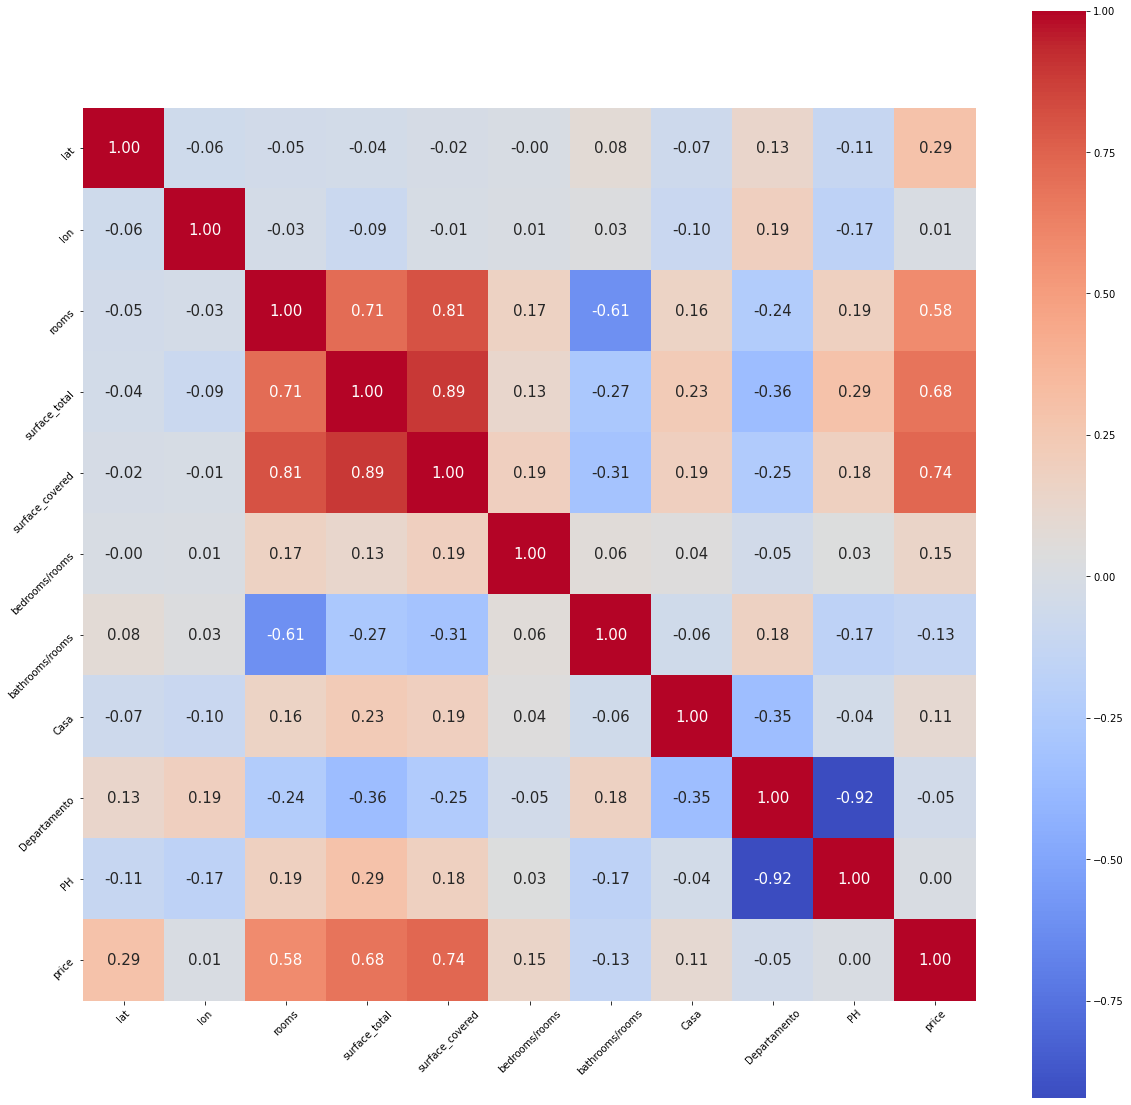

In [136]:
pa = padic6.drop(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque'], axis = 1)

corr = pa.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= pa.columns, 
           yticklabels= pa.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

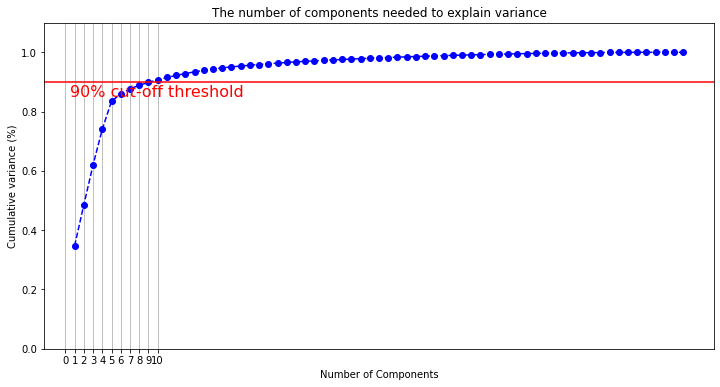

In [137]:
padic7 = padic6.drop(['price'], axis = 1)
pca = PCA().fit(padic7)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 68, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Vamos a realizar un PCA sobre el dataset para poder comparar mejor los resultados con nuestros ùltimos modelos.

In [138]:
pca = PCA(n_components = 10)
pca.fit(padic7)
padic8 = pca.transform(padic7)
padic9 = pd.DataFrame(padic8)
padic9

,0,1,2,3,4,5,6,7,8,9
0,-1.531473,-0.707601,-0.725917,0.107488,-0.585208,-0.183787,0.102027,-0.041079,-0.067123,0.009765
1,-1.503007,-0.997514,-0.251233,-0.570790,-0.514775,-0.071850,0.114408,-0.088926,-0.042817,0.022735
2,-1.807911,-0.115968,0.549347,-0.385796,1.099673,-0.482133,0.509648,-0.086230,-0.072409,0.111569
3,-1.203444,-1.008260,-0.115550,-0.679480,-0.294415,0.034659,-0.017580,-0.096026,-0.038797,-0.030590
4,-0.884449,-0.858335,-0.204704,-0.495634,-0.042750,0.287643,-0.197719,-0.092156,-0.033125,0.334343
...,...,...,...,...,...,...,...,...,...,...
54898,5.711438,0.042249,0.233209,0.224446,-0.586549,-1.103058,1.096219,-0.049711,0.815558,-0.084668
54899,5.146471,-0.847086,-0.972360,1.578340,0.472816,-1.535165,1.407928,0.168306,-0.264647,0.008780
54900,4.732047,0.094595,0.201729,1.584903,-0.200082,-1.632870,1.677942,0.122912,-0.225950,0.160220
54901,4.682503,-0.930575,-2.644621,-0.461221,2.335300,-1.736422,1.728750,0.091673,-0.178933,-0.005730


Vizualizamos nuestro nuevo dataset con PCA.

In [139]:
X = padic9
y = p31["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

random_xgbr.fit(X_train, y_train)
print(random_xgbr.best_params_)

{'min_child_weight': 9, 'max_depth': 23, 'gamma': 0.30000000000000004}


Realizamos un random search con XGBoost Regressor para comparar los resultados con nuestro mejor modelo anterior.

In [140]:
y_train_pred = random_xgbr.predict(X_train)
y_test_pred = random_xgbr.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {train_rmse}')
print(f'Raíz del error cuadrático medio en Test: {test_rmse}')

Raíz del error cuadrático medio en Train: 6287.0975082357145
Raíz del error cuadrático medio en Test: 30759.82571373014


Visualizamos que el RMSE de Test y la diferencia de Train-Test no cambiò casi nada comparado a nuestro modelo anterior. Empeorò muy poco, pero no es siginificativo.

In [141]:
final4 = {"Modelo":["XGBoost Optimizado", "XGBoost Optimizado"], 
           "Hiper-parámetros":["min_child_weight: 6/profundidad: 24/gamma: 0.2", "min_child_weight: 4/profundidad: 17/gamma: 0.1"], 
           "Variables X": [ "PCA 10 1", "PCA 10 2"],
           "P2 RMSE (test)":["~29000", "~30000"],
           "P2 Diferencia RMSE Test-Train":["~22000", "~22000"]}
pd.DataFrame(final4)

,Modelo,Hiper-parámetros,Variables X,P2 RMSE (test),P2 Diferencia RMSE Test-Train
0,XGBoost Optimizado,min_child_weight: 6/profundidad: 24/gamma: 0.2,PCA 10 1,~29000,~22000
1,XGBoost Optimizado,min_child_weight: 4/profundidad: 17/gamma: 0.1,PCA 10 2,~30000,~22000


Los resultados obtenidos son infìmimamente peores, lo cuàl no tiene valor real para poder decir que la nueva transformaciòn que hicimos empeorò el modelo, pero al ser nuestro primer dataset màs simple y tener muy ligèramente mejores resultados nos vamos a quedar con la primera transformaciòn que hicimos.

**CLUSTERING**

In [142]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

Importamos las librerías de KMEeans, DBSCAN y los silhouette.

In [143]:
p26

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0,75000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-34.603890,-58.410998,2.0,1.0,1.0,33.0,33.0,70000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,132411.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-34.603823,-58.405176,2.0,1.0,1.0,42.0,NaN,115000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-34.604796,-58.413487,2.0,1.0,1.0,62.0,40.0,124900.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,7.0,6.0,1.0,NaN,NaN,390000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,-34.647424,-58.495261,7.0,4.0,2.0,117.0,NaN,290000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,-34.632856,-58.488222,7.0,6.0,3.0,NaN,NaN,160000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,-34.611912,-58.475513,7.0,0.0,3.0,NaN,NaN,350000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizamos el dataset encodeado y con el precio incluìdo.

In [144]:
columns = ['Casa', 'Departamento', 'PH', 'Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Catalinas', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda',
       'Parque Centenario', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Pompeya', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque']

In [145]:
pclus = p26.drop(columns, axis=1)
pclus

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-34.608246,-58.444262,2.0,1.0,1.0,31.0,31.0,75000.0
1,-34.603890,-58.410998,2.0,1.0,1.0,33.0,33.0,70000.0
2,-34.599332,-58.412171,2.0,1.0,2.0,46.0,43.0,132411.0
3,-34.603823,-58.405176,2.0,1.0,1.0,42.0,NaN,115000.0
4,-34.604796,-58.413487,2.0,1.0,1.0,62.0,40.0,124900.0
...,...,...,...,...,...,...,...,...
54898,-34.608239,-58.453678,7.0,6.0,1.0,NaN,NaN,390000.0
54899,-34.647424,-58.495261,7.0,4.0,2.0,117.0,NaN,290000.0
54900,-34.632856,-58.488222,7.0,6.0,3.0,NaN,NaN,160000.0
54901,-34.611912,-58.475513,7.0,0.0,3.0,NaN,NaN,350000.0


In [146]:
scaler.fit(pclus)
scaler.fit_transform(pclus)
pclus2 = pd.DataFrame(scaler.fit_transform(pclus), columns = pclus.columns)

In [147]:
pclus3 = pclus2.copy()
pclus3[columns] = p26[columns]
impute_it = IterativeImputer()
pclus4 = impute_it.fit_transform(pclus3)
pclus5 = pd.DataFrame(pclus4, columns = pclus3.columns)
print('Datos faltantes en Superficie cubierta: ', pclus5['surface_covered'].isnull().sum())
print('Datos faltantes en Superficie total: ',pclus5['surface_total'].isnull().sum())
pclus5

Datos faltantes en Superficie cubierta:  0
Datos faltantes en Superficie total:  0


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Casa,Departamento,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-0.308354,-0.105242,-0.577073,-0.779757,-0.565357,-1.214611,-1.188776,-1.207128,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.139074,0.771320,-0.577073,-0.779757,-0.565357,-1.150232,-1.106685,-1.270427,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.038023,0.740428,-0.577073,-0.779757,1.325698,-0.731774,-0.696232,-0.480318,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.136482,0.924747,-0.577073,-0.779757,-0.565357,-0.860530,-0.791119,-0.700737,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.174280,0.705738,-0.577073,-0.779757,-0.565357,-0.216748,-0.819368,-0.575405,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,-0.308069,-0.353390,4.389697,5.126022,-0.565357,4.036061,4.034365,2.780700,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,-1.830747,-1.449176,4.389697,2.763711,1.325698,1.553653,2.188068,1.514723,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,-1.264662,-1.263673,4.389697,5.126022,3.216753,2.939560,3.144374,-0.131047,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,-0.450811,-0.928777,4.389697,-1.960913,3.216753,3.151280,2.651749,2.274309,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
X = pclus5

pca = PCA(n_components = 2)
pca.fit(X)
pkm = pca.transform(X)
pkm2 = pd.DataFrame(pkm)
pkm2

,0,1
0,-2.263099,0.366953
1,-2.239362,0.415393
2,-0.952009,-0.208816
3,-1.757918,0.286869
4,-1.441026,0.269692
...,...,...
54898,8.518464,1.487723
54899,5.749661,2.096150
54900,7.762950,2.456694
54901,5.594300,-0.201663


Hacemos reducción de dimensionalidad con PCA con dos componentes para poder visualizarlo mejor en los gráficos de Clustering.

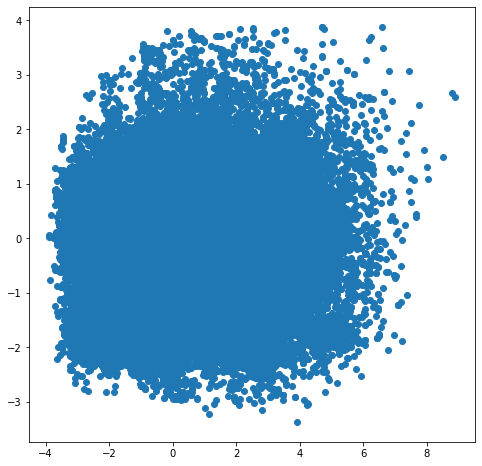

In [149]:
plt.figure(figsize=(8,8))
plt.scatter(pkm2[0], pkm2[1])
plt.show()

Visaulizamos como queda nuestro dataset con PCA de dos componentes. Al estar muy agrupados los datos no creemos que nos van a dar buenos resultados los KMeans y DBSCAN.

**KMEANS**

In [150]:
Sum_of_squared_distances = []
K = np.arange(2,14)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pkm2)
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,pkm2.shape[0])
    Sum_of_squared_distances.append(distancia_media)

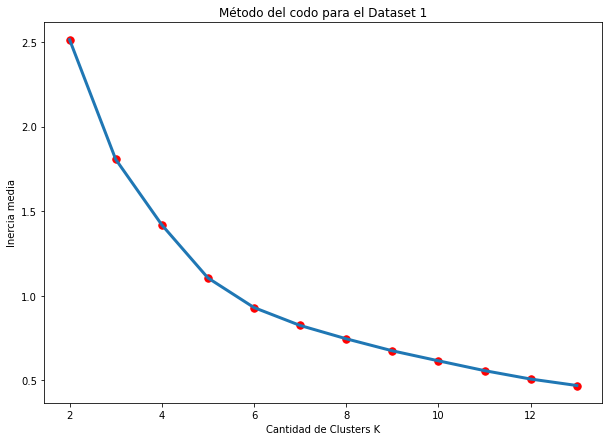

In [151]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

In [152]:
lista_sil = []

for k in range(2,20):
    km = KMeans(n_clusters=k)
    km = km.fit(pkm2)

    etiquetas = km.labels_

    valor_medio_sil = silhouette_score(pkm2, etiquetas)
    lista_sil.append(valor_medio_sil)

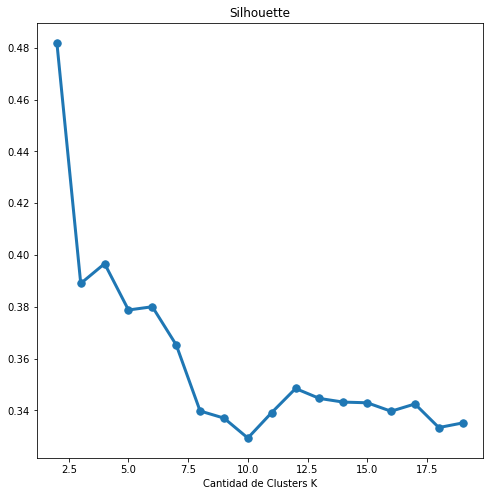

In [153]:
K = np.arange(2,20)

plt.figure(figsize = (8,8))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55)
plt.xlabel('Cantidad de Clusters K')
plt.title("Silhouette")

plt.show()

In [154]:
km = KMeans(n_clusters=6)
labels = km.fit_predict(pkm2)
centroids = km.cluster_centers_

silhouette_vals = silhouette_samples(pkm2, labels)

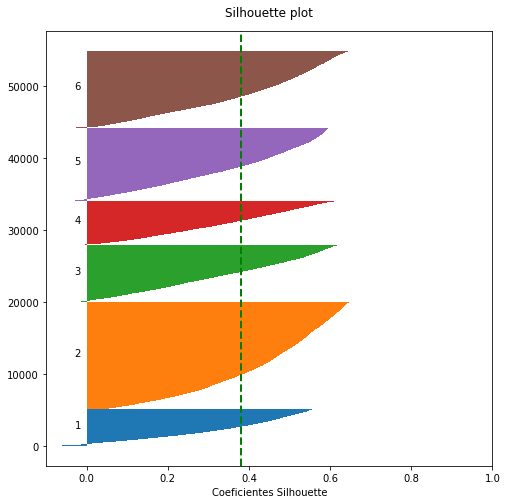

In [155]:
plt.figure(figsize = (8,8))
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
 cluster_silhouette_vals = silhouette_vals[labels == cluster]
 cluster_silhouette_vals.sort()
 y_upper += len(cluster_silhouette_vals)
 plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
 plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
 y_lower += len(cluster_silhouette_vals)

avg_score = np.mean(silhouette_vals)

plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
plt.xlim([-0.1, 1])
plt.xlabel('Coeficientes Silhouette')
plt.title('Silhouette plot', y=1.02)

plt.show()

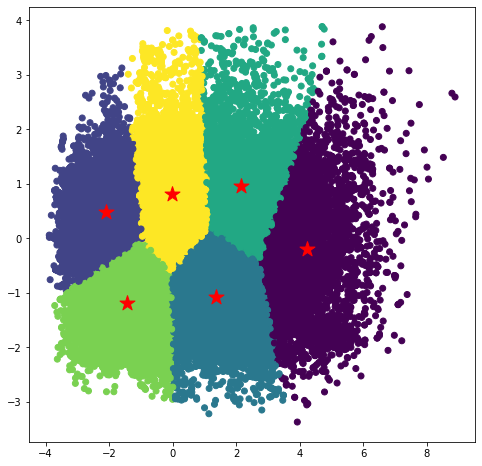

In [156]:
plt.figure(figsize = (8,8))
plt.scatter(pkm2[0], pkm2[1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
plt.show()

**DBSCAN**

In [159]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[0], xy[1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[0], xy[1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

In [210]:
db_1 = DBSCAN(eps=0.2, min_samples=10)
db = db_1.fit(pkm2)

labels = db_1.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [211]:
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 311


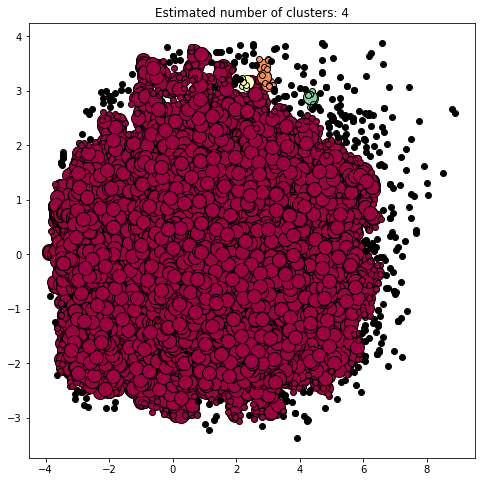

In [212]:
plt.figure(figsize = (8,8))
plot_DBSCAN(pkm2,labels,db,n_clusters)
plt.show()

In [213]:
valor_medio_sil = silhouette_score(pkm2, labels)
print(valor_medio_sil)

0.2714545660007106
